<a href="https://colab.research.google.com/github/avelic5/Most-Streamed-Spotify-Songs-2023/blob/main/VIS24_TIM17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biblioteke i uneseni set podataka

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates

import statsmodels.api as sm
import statistics
import plotly.express as px
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objects as go
from mpl_toolkits import mplot3d
from prettytable import PrettyTable
from google.colab import drive
colors = ["#8c0404","#f25ed0","#000000","#16A085","#34495E",
           "#21618C ","#512E5F","#45B39D","#AAB7B8 ","#20B2AA",
           "#FF69B4","#00CED1","#FF7F50","#7FFF00","#DA70D6"]

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:

lista = pd.read_csv('/content/drive/MyDrive/datasets/spotify-2023.csv',encoding='iso-8859-1')
pd.set_option('expand_frame_repr', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)



# Provjera greški u varijablama

In [6]:
lista.isnull().any()

,0
track_name,False
artist(s)_name,False
artist_count,False
released_year,False
released_month,False
released_day,False
in_spotify_playlists,False
in_spotify_charts,False
streams,False
in_apple_playlists,False


Kako su kolone "key" i "in_shazam_charts" True, to znači da je barem jedan od njihovih elemenata NaN(nedostajući podatak) što znači da kolone key i in_shazam_charts imaju ćelija bez podataka.


# Informacije o varijablama u setu podataka

In [7]:
lista.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

# Kratki sažetak vrijednosti iz liste

In [ ]:
lista.describe(include="all")

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953,953,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953,953.000000,953.000000,953,953.000000,903,953.000000,858,953,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
unique,943,645,NaN,NaN,NaN,NaN,NaN,NaN,949,NaN,NaN,348,NaN,198,NaN,11,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Daylight,Taylor Swift,NaN,NaN,NaN,NaN,NaN,NaN,723894473,NaN,NaN,0,NaN,0,NaN,C#,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,34,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,24,NaN,344,NaN,120,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,NaN,67.812172,51.908709,NaN,2.666317,NaN,122.540399,NaN,NaN,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,NaN,NaN,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,NaN,86.441493,50.630241,NaN,6.035599,NaN,28.057802,NaN,NaN,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,NaN,NaN,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,65.000000,NaN,NaN,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,NaN,NaN,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,NaN,13.000000,7.000000,NaN,0.000000,NaN,100.000000,NaN,NaN,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,NaN,NaN,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,NaN,34.000000,38.000000,NaN,0.000000,NaN,121.000000,NaN,NaN,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,NaN,NaN,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,NaN,88.000000,87.000000,NaN,2.000000,NaN,140.000000,NaN,NaN,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000


In [ ]:
#Brisanje reda koji sadrzi pjesmu "Love Grows (Where My Rosemary Goes)" zbog neispravnosti podataka
index_to_drop = lista[lista['track_name'] == 'Love Grows (Where My Rosemary Goes)'].index

lista.drop(index_to_drop, inplace=True)

# **Pitanje 1**: Koja je pjesma bila najslušanija 2023. godine?

In [ ]:
lista['artist(s)_name'].unique().size

644

In [ ]:
lista['track_name'].unique().size

942

Postoji 943 pjesme i 645 izvodjača, što znači da nekoliko izvođača ima više slušanih pjesama u datasetu.

TOP 10 najslušanijih pjesama je dato u narednoj tabeli

In [ ]:
lista_df = lista.copy()
top_10_songs = lista_df.sort_values(by = "streams", ascending = False).iloc[:10,:]
top_10_songs = lista_df.query('track_name != "Love Grows (Where My Rosemary Goes)"').sort_values(by="streams", ascending=False).head(10)

top_10_songs

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
33,Anti-Hero,Taylor Swift,1,2022,10,21,9082,56,999748277,242,142,165,9,310,97,E,Major,64,51,63,12,0,19,5
625,Arcade,Duncan Laurence,1,2019,3,7,6646,0,991336132,107,47,584,1,NaN,72,A,Minor,45,27,33,82,0,14,4
253,Glimpse of Us,Joji,1,2022,6,10,6330,6,988515741,109,42,158,3,31,170,G#,Major,44,27,32,89,0,14,5
455,Seek & Destroy,SZA,1,2022,12,9,1007,0,98709329,5,31,1,0,0,152,C#,Major,65,35,65,44,18,21,7
98,Summertime Sadness,Lana Del Rey,1,2011,1,1,20333,52,983637508,89,143,"1,632",3,200,112,C#,Minor,56,24,66,7,0,12,3
891,"Come Back Home - From ""Purple Hearts""",Sofia Carson,1,2022,7,12,367,0,97610446,28,67,195,0,0,145,G,Major,56,43,53,24,0,12,4
427,Where Are You Now,"Lost Frequencies, Calum Scott",2,2021,7,30,10565,44,972509632,238,122,557,17,58,121,F#,Minor,67,26,64,52,0,17,10
322,I Love You So,The Walters,1,2014,11,28,7536,7,972164968,44,19,135,0,6,76,A#,Major,58,46,67,65,0,13,4
130,Queencard,(G)I-DLE,1,2023,5,15,451,33,96273746,10,126,7,0,148,130,E,Minor,82,69,83,3,0,27,5
269,Double Fantasy (with Future),"The Weeknd, Future",2,2023,4,21,1169,0,96180277,36,65,28,0,0,119,A,Minor,60,10,57,1,0,50,3


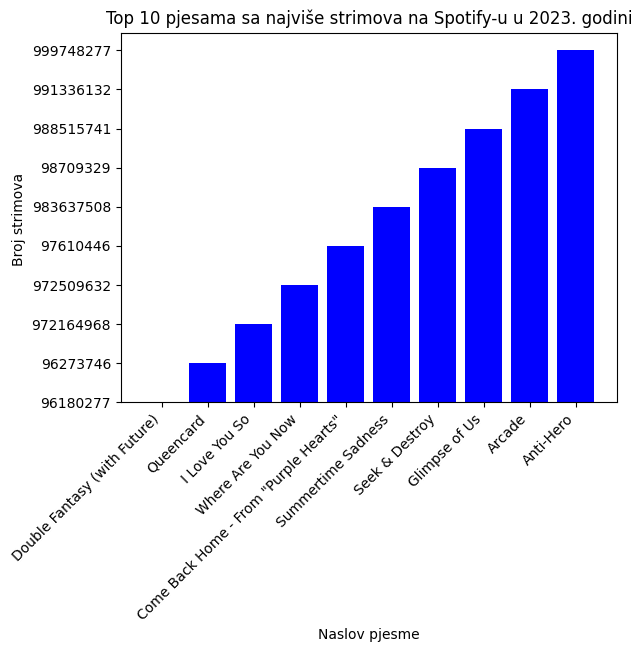

In [ ]:

plt.bar(top_10_songs["track_name"][::-1], top_10_songs["streams"][::-1], color="blue")


plt.title("Top 10 pjesama sa najviše strimova na Spotify-u u 2023. godini")
plt.xlabel("Naslov pjesme")
plt.ylabel("Broj strimova ")


plt.xticks(rotation=45, ha='right')


plt.show()

Možemo uočiti kako je pjesma Anti-Hero najslušanija u 2023. godini na Spotify-u

In [ ]:
red_sa_poznatom_vrijednoscu = lista.loc[lista['track_name'] == "Anti-Hero"]
print(red_sa_poznatom_vrijednoscu)

   track_name artist(s)_name  artist_count  released_year  released_month  released_day  in_spotify_playlists  in_spotify_charts    streams  in_apple_playlists  in_apple_charts in_deezer_playlists  in_deezer_charts in_shazam_charts  bpm key   mode  danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  speechiness_%
33  Anti-Hero   Taylor Swift             1           2022              10            21                  9082                 56  999748277                 242              142                 165                 9              310   97   E  Major              64         51        63              12                   0          19              5


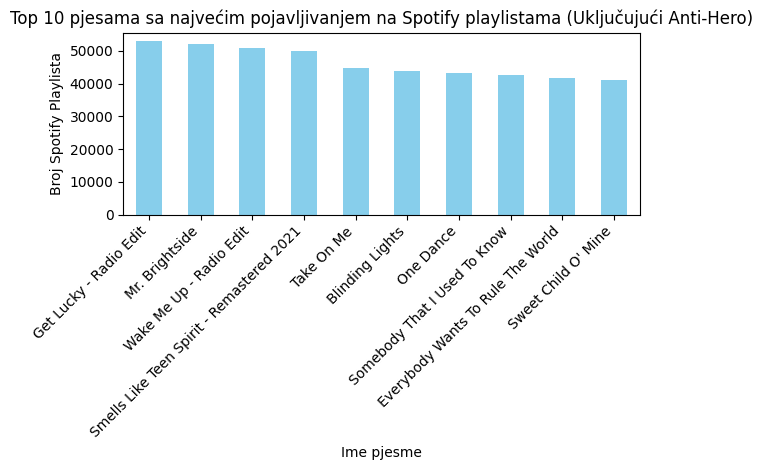

In [ ]:

red_anti_hero = lista.loc[lista['track_name'] == 'Anti-Hero']


if not red_anti_hero.empty:

    lista_s_anti_hero = pd.concat([red_anti_hero, lista], ignore_index=True)


    top_10 = lista_s_anti_hero.nlargest(10, 'in_spotify_playlists')


    top_10.plot(kind='bar', x='track_name', y='in_spotify_playlists', color='skyblue', legend=False)


    plt.xlabel('Ime pjesme')
    plt.ylabel('Broj Spotify Playlista')


    plt.title('Top 10 pjesama sa najvećim pojavljivanjem na Spotify playlistama (Uključujući Anti-Hero)')


    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Nije pronađen red s track_name 'Anti-Hero'.")

Kako vidimo Anti-Hero se ne nalazi u Top 10 pjesama sa najvećim pojavljivanjem na Spotify playlistama, a ukoliko pogledamo naprimjer danceability, uočit ćemo sljedeće:

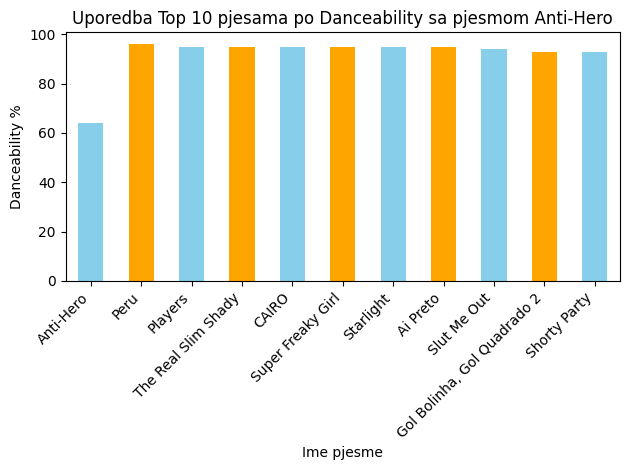

In [ ]:


top_10_danceability = lista.nlargest(10, 'danceability_%')

red_anti_hero = lista.loc[lista['track_name'] == 'Anti-Hero']

if not red_anti_hero.empty:
    lista_s_anti_hero = pd.concat([red_anti_hero, top_10_danceability], ignore_index=True)

    lista_s_anti_hero.plot(kind='bar', x='track_name', y='danceability_%', color=['skyblue', 'orange'], legend=False)

    plt.xlabel('Ime pjesme')
    plt.ylabel('Danceability %')

    plt.title('Uporedba Top 10 pjesama po Danceability sa pjesmom Anti-Hero')


    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Nije pronađen red s track_name 'Anti-Hero'.")


Anti-Hero ima danceablity nešto više od 60%, dok imamo najmanje 10 pjesama sa 100% danceability, a naravno i više

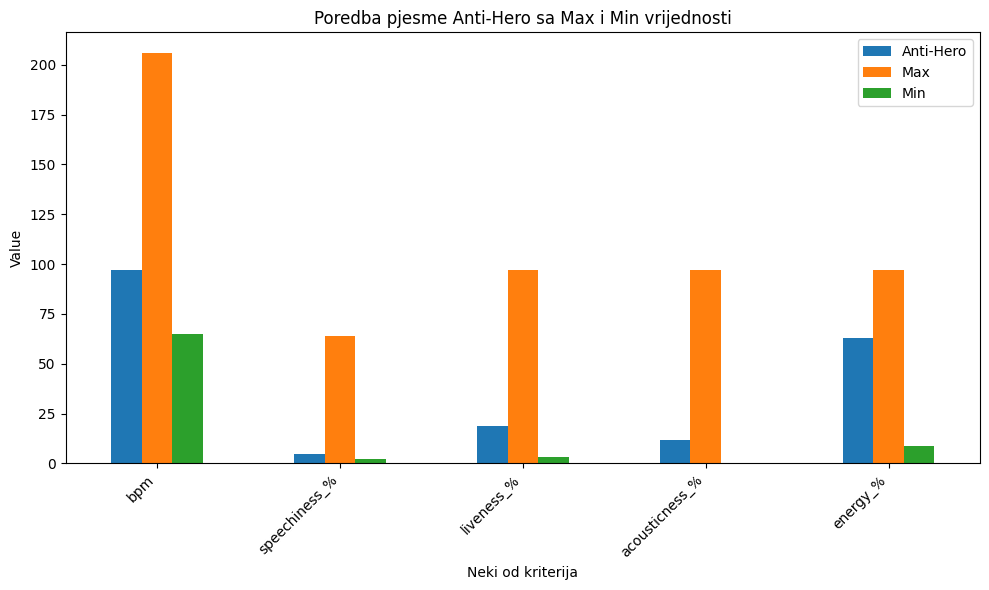

In [ ]:
pd.options.mode.chained_assignment = None
numeric_columns = ['bpm','speechiness_%','liveness_%','acousticness_%', 'energy_%']
numeric_data = lista[numeric_columns]

numeric_data.dropna(inplace=True)

red_anti_hero = lista.loc[lista['track_name'] == 'Anti-Hero']

if not red_anti_hero.empty:
    anti_hero_properties = red_anti_hero.iloc[0]

    comparison_data = []
    for column in numeric_data.columns:
        max_value = numeric_data[column].max()
        min_value = numeric_data[column].min()
        comparison_data.append({'Neki od kriterija': column, 'Anti-Hero': anti_hero_properties[column], 'Max': max_value, 'Min': min_value})

    comparison = pd.DataFrame(comparison_data)
    comparison.set_index('Neki od kriterija', inplace=True)
    comparison.plot(kind='bar', figsize=(10, 6))
    plt.title('Poredba pjesme Anti-Hero sa Max i Min vrijednosti')
    plt.xlabel('Neki od kriterija')
    plt.ylabel('Value')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Nije pronađen red s track_name 'Anti-Hero'.")


Ako uzmemo još neke kriterije, vidimo da Anti-Hero ne dostiže ekstreme u ostalim područjima, čak štaviše bliže se nalazi minimalnim nego maximalnim vrijednostima, što je priloženo.

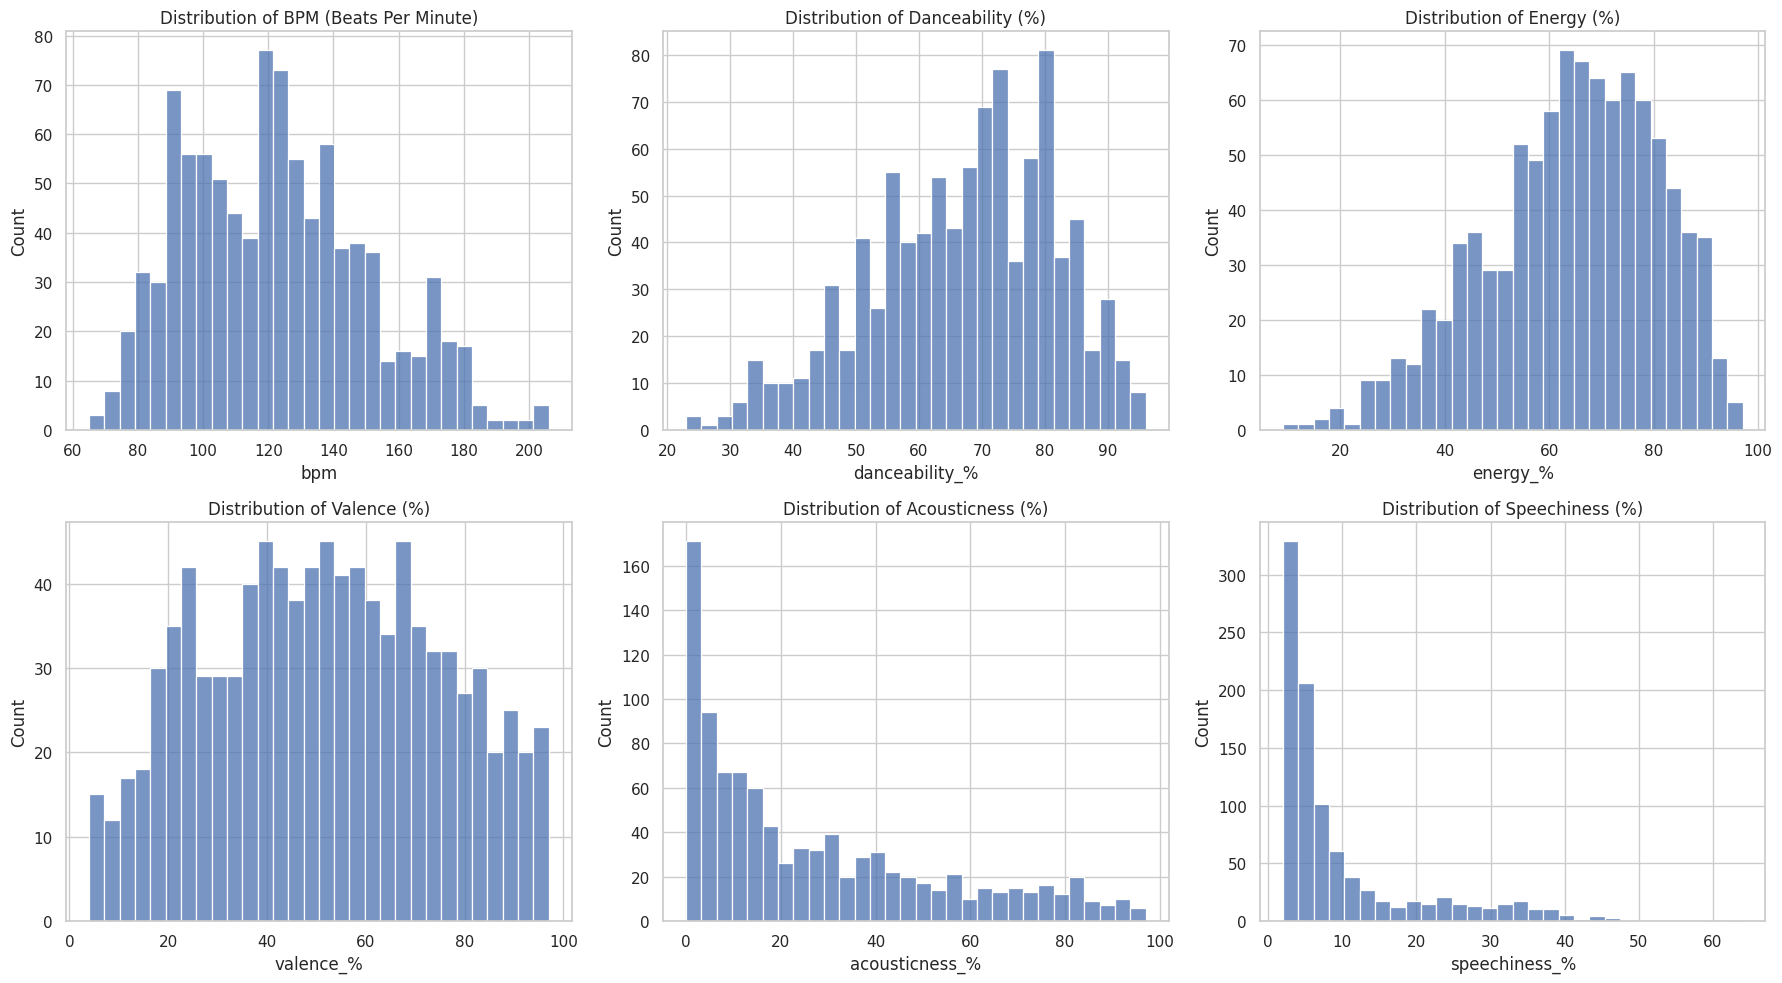

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# BPM (Beats Per Minute)
sns.histplot(lista['bpm'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of BPM (Beats Per Minute)')

# Danceability
sns.histplot(lista['danceability_%'], bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Danceability (%)')

# Energy
sns.histplot(lista['energy_%'], bins=30, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Energy (%)')

# Valence
sns.histplot(lista['valence_%'], bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Valence (%)')

# Acousticness
sns.histplot(lista['acousticness_%'], bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Acousticness (%)')

# Speechiness
sns.histplot(lista['speechiness_%'], bins=30, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Speechiness (%)')

plt.tight_layout()
plt.show()

Ovdje je prikazana distribucija svih pjesama po određenim kriterijima. Možemo zaključiti da pjesme što se tiče acousticness i speechiness ne dosežu ekstreme

Pogledajmo još broj pjesama raspoređenih po datumu objavljivanja

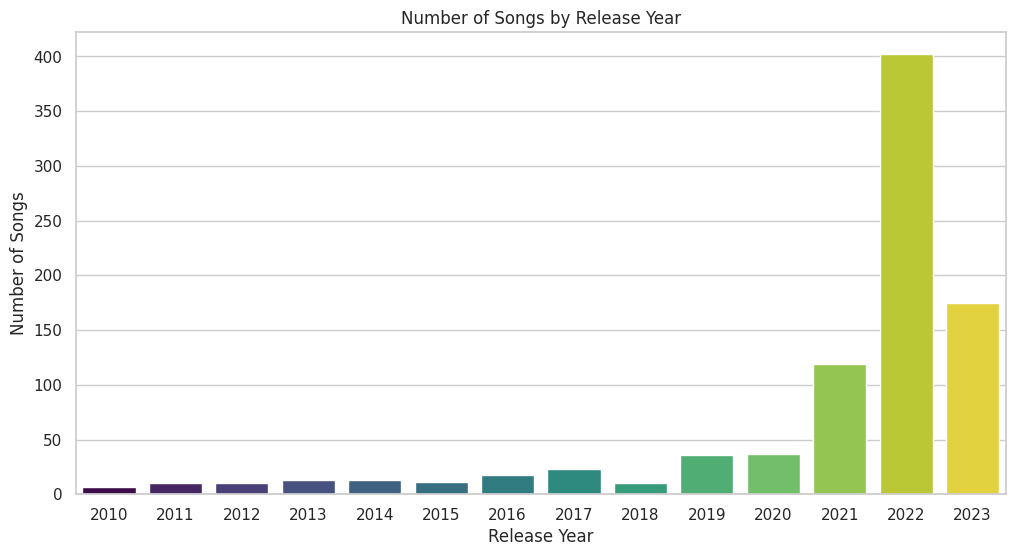

In [ ]:
songs_by_year = lista['released_year'].value_counts().reset_index()
songs_by_year.columns = ['released_year', 'count']
plt.figure(figsize=(12, 6))
sns.barplot(x='released_year', y='count', hue='released_year' , legend=False, data=songs_by_year.head(14), palette='viridis')
plt.title('Number of Songs by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.show()


Kao zaključak možemo izvesti da većinski dio pjesama je izašao 2022.godine

# **Pitanje 2**: Ko je imao najviše pjesama u 2023. godini koje su se slušale?

In [ ]:
artist_counts = lista['artist(s)_name'].value_counts()
iplot(px.bar(artist_counts[:15],
             text_auto = True,
             color = artist_counts[:15].index,
             color_discrete_sequence = colors,
             labels=dict(index="Ime izvodjača",value="Broj pjesama"),
             title = 'Top 15 izvodjača sa najviše pjesama'
            ))

Možemo uočiti kako Taylor Swift ima čak 34 pjesme što iznosi 3,06% od ukupnog broja pjesama u datasetu. Također, već smo vidjeli da je najslušanija pjesma upravo od Taylor Swift pod imenom "Anti-Hero"

Ako znamo da pjesma koju posmatramo je pjesma od Taylor Swift, koja je vjerovatnoća da je ta pjesma upravo Anti-Hero?

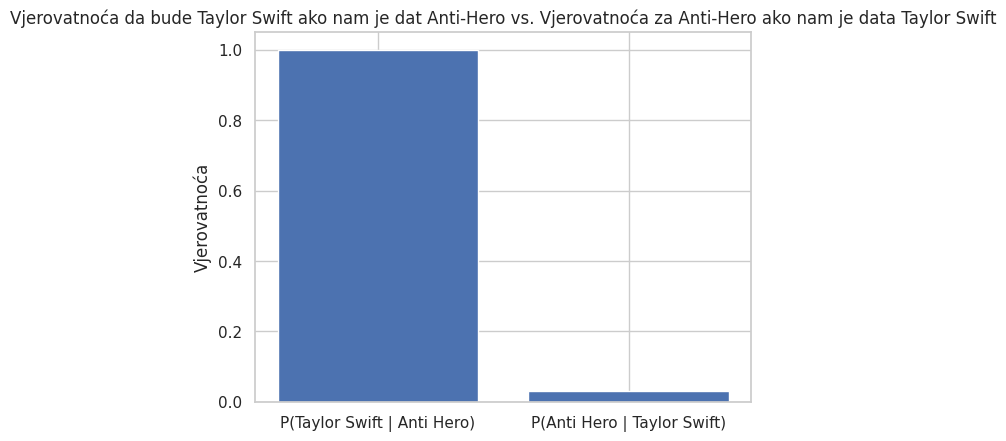

In [ ]:

total_songs = 943
taylor_swift_songs = 34
non_taylor_swift_songs = total_songs - taylor_swift_songs


anti_hero_taylor_swift = 1


p_anti_hero_given_taylor_swift = anti_hero_taylor_swift / taylor_swift_songs


p_taylor_swift = taylor_swift_songs / total_songs


p_anti_hero = anti_hero_taylor_swift / total_songs


p_taylor_swift_given_anti_hero = (p_anti_hero_given_taylor_swift * p_taylor_swift) / p_anti_hero


plt.bar(['P(Taylor Swift | Anti Hero)', 'P(Anti Hero | Taylor Swift)'], [p_taylor_swift_given_anti_hero, p_anti_hero_given_taylor_swift])
plt.ylabel('Vjerovatnoća')
plt.title('Vjerovatnoća da bude Taylor Swift ako nam je dat Anti-Hero vs. Vjerovatnoća za Anti-Hero ako nam je data Taylor Swift')
plt.show()


Uz uslov da imamo pjesmu Anti-Hero vjerovatnoća je 1 da imamo Taylor Swift kao rezultat, što predstavlja neki banalan primjer. Međutim vjerovatnoća da, ako znamo da je neka pjesma od Taylor Swift,upravo Anti-Hero, iznosi 0,02941

# Hipoteza: Režim muzike utječe na slušanost pjesama

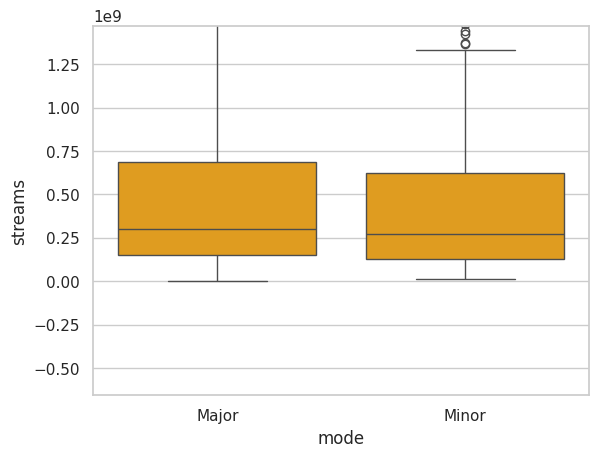

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

lista['streams'] = lista['streams'].astype(float)

sns.boxplot(x='mode', y='streams', data=lista, color='orange')

q1 = lista['streams'].quantile(0.25)
q3 = lista['streams'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

plt.ylim(lower_limit, upper_limit)

plt.show()


Veći raspon: Prva kategorija (režim muzike) ima blagi veći raspon vrijednosti od druge. Iako su medijan i većina podataka u prvom kvartilu isti, podaci u gornjem kvartilu (Q3) i maksimalna vrijednost su blago veći za prvu kategoriju.

Veći interes za prvu kategoriju: Veći broj streamova za prvu kategoriju može ukazivati na veći interes publike za tu vrstu muzike ili na veću popularnost tog muzičkog režima.

Međutim, te razlike su neznatno male, pa možemo reći da režim muzike nema utjecaja na slušanost

# Hipoteza: Broj pojavljivanja pojedinačnih pjesama je jednak ili približno jednak i na spotify i na apple playlistama

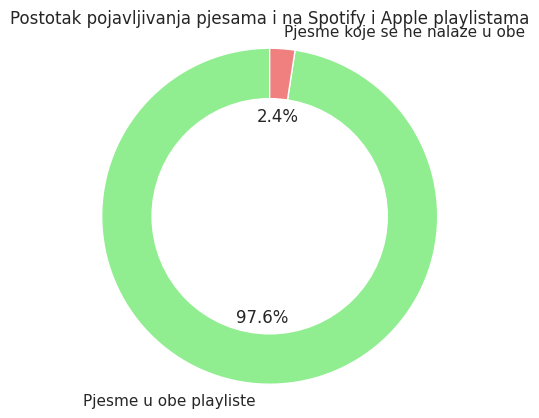

In [ ]:

broj_pjesama_podjednako = lista[(lista['in_spotify_playlists'] > 0) & (lista['in_apple_playlists'] > 0)].shape[0]

postotak_poklapanja = (broj_pjesama_podjednako / len(lista)) * 100
postotak_razlike = 100 - postotak_poklapanja

sizes = [postotak_poklapanja, postotak_razlike]
labels = ['Pjesme u obe playliste', 'Pjesme koje se ne nalaze u obe']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
ax.axis('equal')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Postotak pojavljivanja pjesama i na Spotify i Apple playlistama')

plt.show()


Ovdje možemo uočiti drastičnu razliku između pjesama koje se pojavljuju u obe playliste i onih koji se ne pojavljuju. Dati problem je posljedica sljedećega:

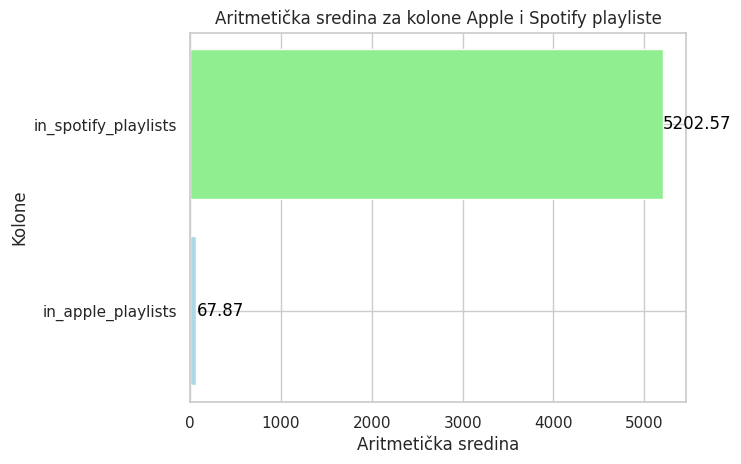

In [ ]:

sredina_apple = lista['in_apple_playlists'].mean()
sredina_spotify = lista['in_spotify_playlists'].mean()
kolone = ['in_apple_playlists', 'in_spotify_playlists']
sredine = [sredina_apple, sredina_spotify]

plt.barh(kolone, sredine, color=['lightblue', 'lightgreen'])


for i in range(len(kolone)):
    plt.text(sredine[i], i, str(round(sredine[i], 2)), ha='left', va='center', color='black')

plt.title('Aritmetička sredina za kolone Apple i Spotify playliste')
plt.xlabel('Aritmetička sredina')
plt.ylabel('Kolone')

plt.show()

Iz datog grafika možemo uočiti da postoje drastične razlike izmedju aritmertičkih vrijednosti kolona "in_spotify_playlists" i "in_apple_playlists". Uzrok tome može biti da pjesme, koje su popularne kod Spotify korisnika, nisu nužno popularne i kod Apple korisnika, ili da se Apple pretjerano ne koristi. O daljim mogućnostima datih događaja nećemo ulaziti.

Pogledajmo i vrijednosti mode i mediane za date kolone

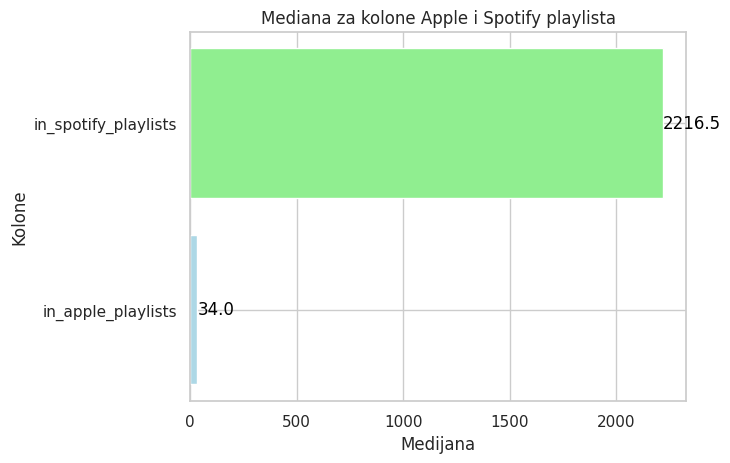

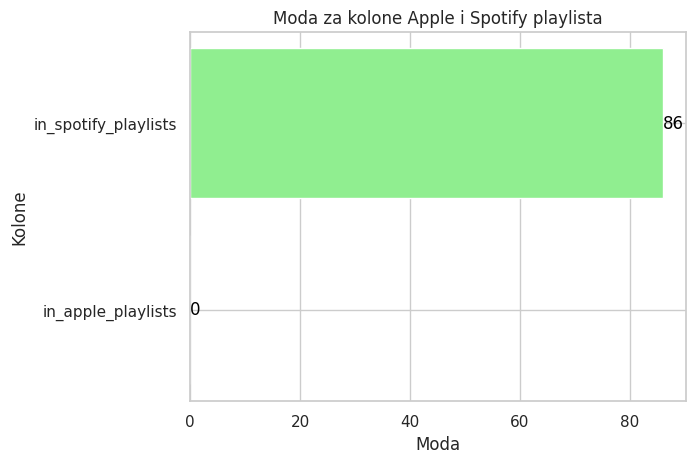

In [ ]:

mediana_apple = lista['in_apple_playlists'].median()
moda_apple = lista['in_apple_playlists'].mode()[0]

mediana_spotify = lista['in_spotify_playlists'].median()
moda_spotify = lista['in_spotify_playlists'].mode()[0]

kolone = ['in_apple_playlists', 'in_spotify_playlists']
medianas = [mediana_apple, mediana_spotify]
mode = [moda_apple, moda_spotify]

plt.barh(kolone, medianas, color=['lightblue', 'lightgreen'])

for i in range(len(kolone)):
    plt.text(medianas[i], i, str(round(medianas[i], 2)), ha='left', va='center', color='black')

plt.title('Mediana za kolone Apple i Spotify playlista')
plt.xlabel('Medijana')
plt.ylabel('Kolone')

plt.show()

plt.barh(kolone, mode, color=['lightblue', 'lightgreen'])


for i in range(len(kolone)):
    plt.text(mode[i], i, str(mode[i]), ha='left', va='center', color='black')

plt.title('Moda za kolone Apple i Spotify playlista')
plt.xlabel('Moda')
plt.ylabel('Kolone')

plt.show()

Kao što vidimo u priloženoj vizualizaciji podataka, mediana je ponovno znatno veća kod kolone in_spotify_playlists nego kod kolone in_apple_playlists što upučuje da nema nekih znatnih ekstrema u datim kolonama. Kada pogledamo modu, in_spotify_playlists je 86, dok je kod in_apple_playlists 0, što znači da nema dominante vrijednosti

# **Pitanje 3**: Kakva je distribucija izvođača pjesama u Spotify?

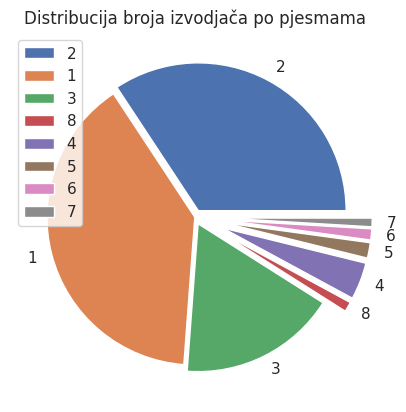

In [ ]:
izvodjaci = lista["artist_count"].unique()
pie_arr=[]
for i in izvodjaci:
    pie_arr.append(lista.loc[lista["artist_count"]==i]["artist_count"].sum().tolist())
labels = izvodjaci
explode = [0.05,0,0.05,0.2,0.2,0.2,0.2,0.2]
plt.pie(pie_arr,labels = labels,explode = explode)
plt.title("Distribucija broja izvodjača po pjesmama")
plt.legend()
plt.show()


Na osnovu ovoga možemo zaključiti da većina pjesama se sastoji od jednog izvođača. Najveći broj izvođača prisutnih po pjesmama je 8

# **Pitanje 4**: Kako BPS pjesme utječe na druge karakteristike pjesme poput plesnosti?

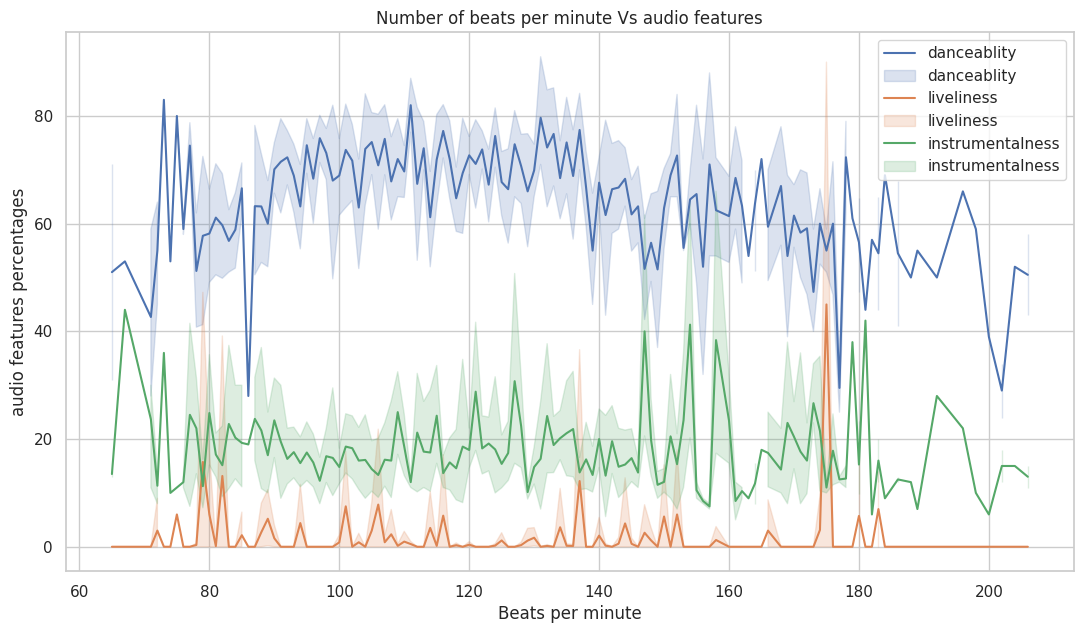

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Number of beats per minute Vs audio features")
plt.xlabel("Beats per minute")
plt.ylabel("audio features percentages")
sns.lineplot(x=lista["bpm"].tolist(),y=lista["danceability_%"].tolist())
sns.lineplot(x=lista["bpm"].tolist(),y=lista["instrumentalness_%"].tolist())
sns.lineplot(x=lista["bpm"].tolist(),y=lista["liveness_%"].tolist())
plt.legend(["danceablity", "danceablity","liveliness","liveliness","instrumentalness","instrumentalness"], loc ="upper right")
plt.show()

Kao zaključak možemo izvesti da liveliness dostiže drastičan rast kad je vrijednost BPM izmedju 170-180.
Što se tiče instrumentalness možemo reći da nema izraženijih padova i rasta promjenom BPM, a danceability dostiže pad, možemo reći, izmedju 80 i 90 BPM

# **Pitanje 5**: U kojem danu i mjesecu je objavljeno najviše pjesama?


Prvo provjeravamo u kojem danu i mjesecu je objavljeno najviše pjesama.

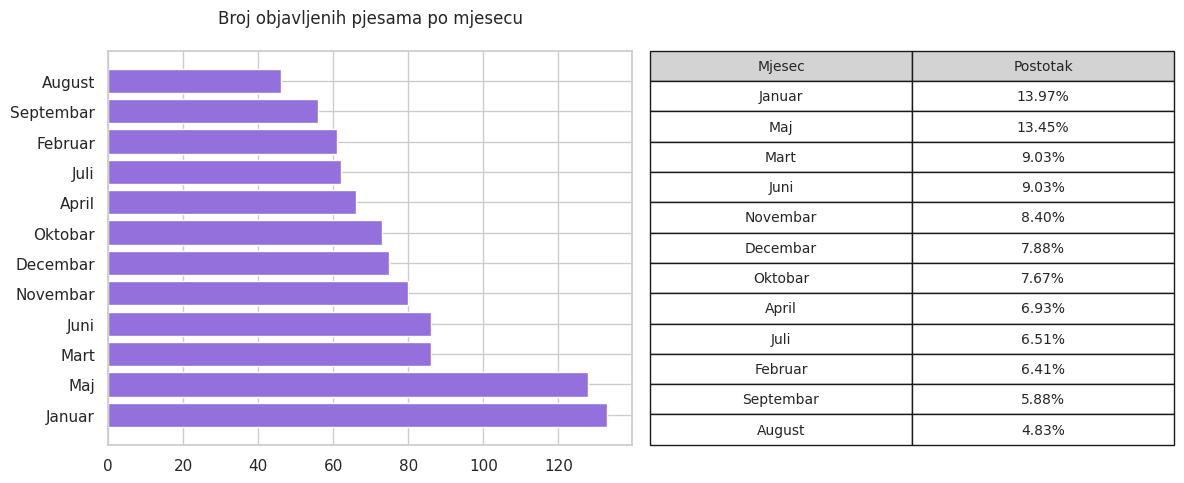

In [ ]:
lista_df=lista.copy()
release_month = lista_df['released_month']
month_names = {1: "Januar", 2: "Februar", 3: "Mart", 4: "April", 5: "Maj", 6: "Juni",
               7: "Juli", 8: "August", 9: "Septembar", 10: "Oktobar", 11: "Novembar", 12: "Decembar"}
value_counts = release_month.replace(month_names).value_counts()
total_count = value_counts.sum()
percentages = (value_counts / total_count) * 100
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
bars = ax[0].barh(value_counts.index, value_counts, color='mediumpurple')
ax[0].set_title('Broj objavljenih pjesama po mjesecu',pad=20)
table_data = [['Mjesec', 'Postotak']]
for month, percentage in percentages.items():
    table_data.append([month, f'{percentage:.2f}%'])
table = ax[1].table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.3, 0.3],
                    cellColours=[['lightgray']*2] + [['white']*2]*12,
                    bbox=[0, 0, 1, 1])
ax[1].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.tight_layout()
plt.show()


Kao što možemo vidjeti na grafiku, najviše pjesama je objavljeno u mjesecima januar i maj, a najmanje u mjesecu augustu.


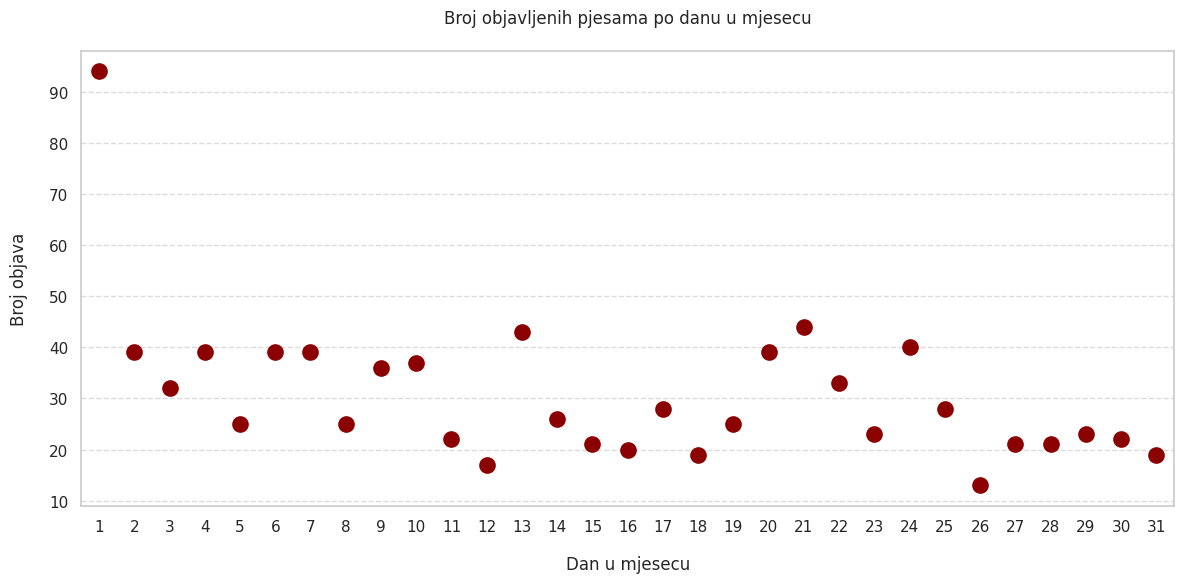

In [ ]:
song_counts = lista_df['released_day'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.swarmplot(x=song_counts.index, y=song_counts.values, color='darkred', size=12)  # Increased size to 12
plt.title('Broj objavljenih pjesama po danu u mjesecu', pad=20)
plt.xlabel('Dan u mjesecu', labelpad=15)
plt.ylabel('Broj objava', labelpad=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Primjećuje se da je u prvom danu zabilježen najveći broj objavljenih pjesama, dok je taj broj drastično opao na kraju mjeseca gdje je dostigao dosta manju vrijednost.


# Hipoteza: Mjesec i dan objave pjesme utiču na njenu popularnost.

Prvo ćemo provjeriti kako mjesec objave pjesme utiče na njenu popularnost.

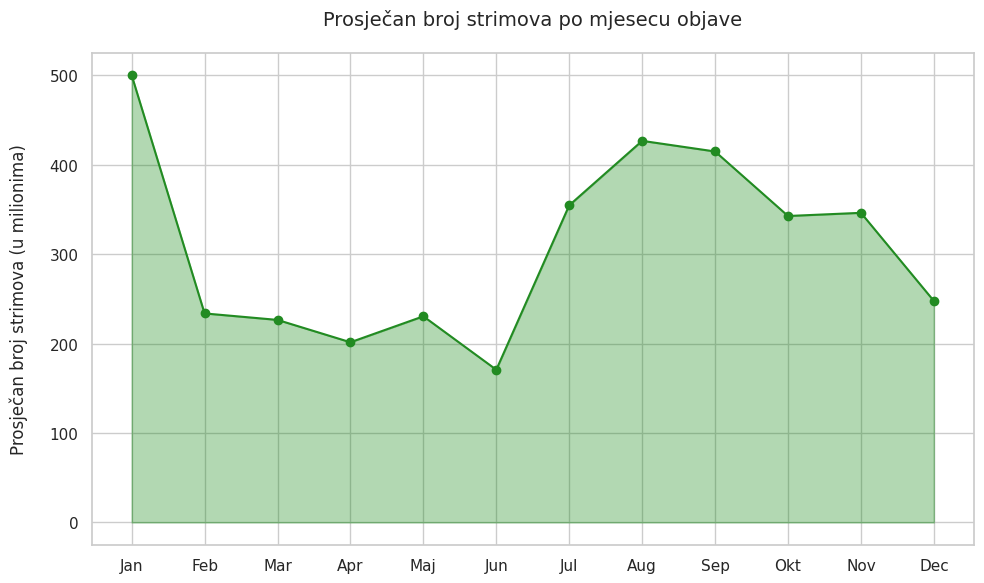

In [ ]:
monthly_streams = lista_df.groupby('released_month')['streams'].median()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'Maj', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dec']

monthly_streams_millions = monthly_streams / 1e6

plt.figure(figsize=(10, 6))
plt.plot(month_names, monthly_streams_millions.values, marker='o', color='forestgreen', linestyle='-')
plt.fill_between(month_names, monthly_streams_millions.values, color='green', alpha=0.3)  # Fill area under the line
plt.ylabel('Prosječan broj strimova (u milionima)', fontsize=12, labelpad=15)
plt.title('Prosječan broj strimova po mjesecu objave', fontsize=14, pad=20)
plt.grid(True)
plt.tight_layout()

plt.show()

Iz ovog line plot-a možemo zaključiti da pjesme objavljene u januaru i augustu imaju najveći broj prosječnih strimova. Možemo isto primjetiti da iako je 13.45% pjesama objavljeno u maju, taj mjesec ima nizak broj prosječnih strimova.

Sada ćemo isto provjeriti za dan u mjesecu

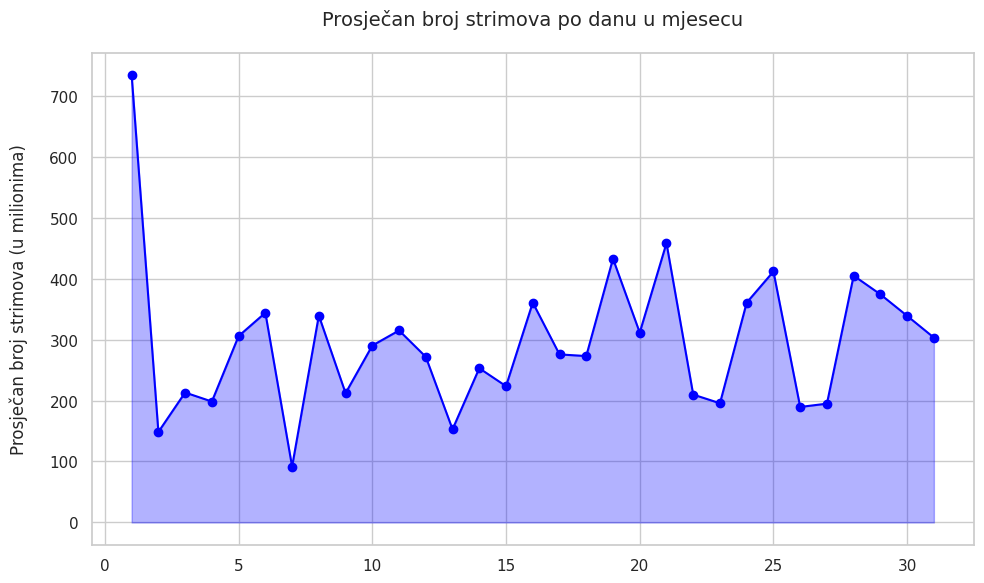

In [ ]:
daily_streams = lista_df.groupby('released_day')['streams'].median()

days_in_month = range(1, 32)  # Assuming maximum 31 days in a month

daily_streams_millions = daily_streams / 1e6

plt.figure(figsize=(10, 6))
plt.plot(days_in_month, daily_streams_millions.values, marker='o', color='blue', linestyle='-')
plt.fill_between(days_in_month, daily_streams_millions.values, color='blue', alpha=0.3)  # Fill area under the line
plt.ylabel('Prosječan broj strimova (u milionima)', fontsize=12, labelpad=15)
plt.title('Prosječan broj strimova po danu u mjesecu', fontsize=14, pad=20)
plt.grid(True)
plt.tight_layout()

plt.show()

Na grafiku se uočava značajan prosječan broj strimova prvog dana u mjesecu, dok ostali dani nisu dostigli znatno različit broj strimova u odnosu jedni na druge. Možemo primjetiti iz grafika da 7. u mjesecu ima najmanji broj prosječnih strimova, i da ostali dani ne prate nikakav obrazac. Iz ostalih dana ne možemo trenutno izvući nikakav zaključak, ali možemo se osvrnuti na 1. dan u mjesecu. Jedan uzrok ovog podatka može biti da mnogi umjetnici i bendovi planiraju izlazak novih singlova, albuma ili projekata prvog u mjesecu. Ovo može rezultirati većom promocijom i interesom korisnika za njihovu glazbu, što dovodi do povećanog broja strimova prvog dana u mjesecu. To možemo vidjeti i na grafiku koji prikazuje broj objavljenih pjesama po danu gdje prvi u mjesecu ima natprosječan broj objava u odnosu na druge dane

# **Pitanje 6:** Da li postoji korelacija između broja pjesama autora na Spotify-u i njihove ukupne popularnosti?

Pearsonov koeficijent korelacije između broja izvođača i broja slušanja: -0.1364634747824177


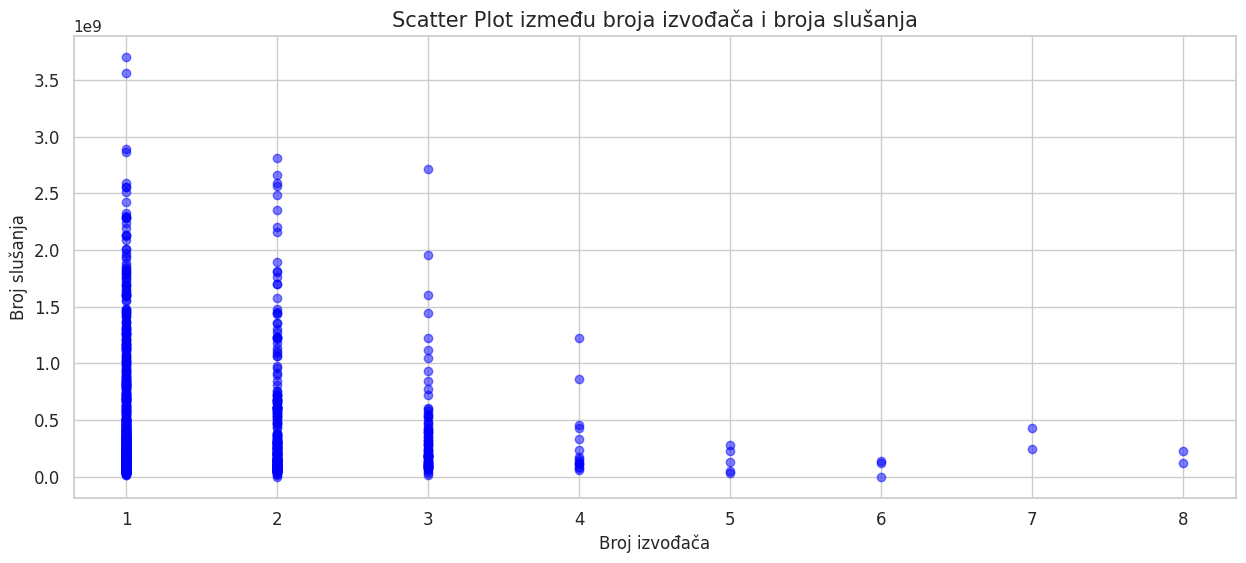

In [ ]:

import matplotlib.pyplot as plt

# Učitavanje podataka


# Izračun Pearsonovog koeficijenta korelacije
correlation = lista['artist_count'].corr(lista['streams'])

print("Pearsonov koeficijent korelacije između broja izvođača i broja slušanja:", correlation)

# Scatter plot
plt.figure(figsize=(15, 6))
plt.scatter(lista['artist_count'], lista['streams'], color='blue', alpha=0.5)
plt.title('Scatter Plot između broja izvođača i broja slušanja', fontsize=15)
plt.xlabel('Broj izvođača')
plt.ylabel('Broj slušanja')
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


 Pearsonov koeficijent korelacije mjeri linearnu vezu između dvije kontinuirane varijable. Njegova vrijednost varira između -1 i 1. Kada je Pearsonov koeficijent negativan, to znači da postoji negativna linearna korelacija između varijabli. To znači da ako jedna varijabla raste, druga varijabla opada, i obrnuto. Na primjer, ako imamo negativnu korelaciju između broja pjesama autora na Spotify-u i njihove popularnosti, to bi značilo da autori s više pjesama imaju manju popularnost, a autori s manje pjesama imaju veću popularnost, što jasno možemo vidjeti iz scatter plota.






# **Hipoteza:** Postoji korelacija između broja pjesama autora na Spotify-u i njihove ukupne popularnosti.

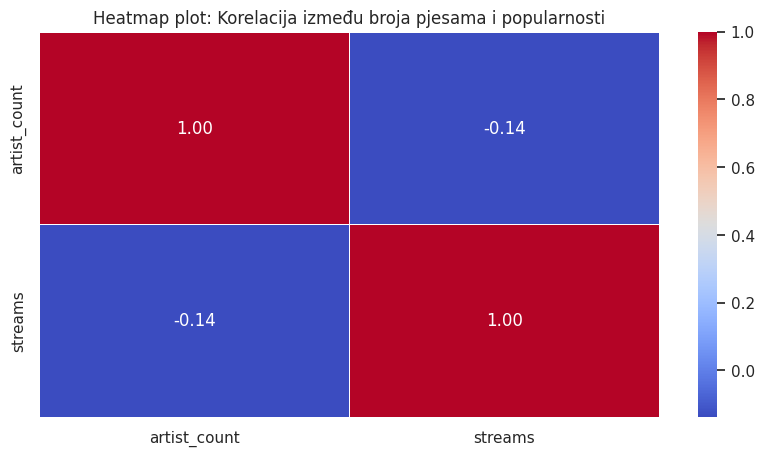

In [ ]:
# Izračun matrice korelacije
corr_matrix = lista[['artist_count', 'streams']].corr()

# Prikazivanje heatmap plot-a
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap plot: Korelacija između broja pjesama i popularnosti')
plt.show()

Na osnovu heatmap plota jasno se uočava korelacija između broja pjesama i ukupne popularnosti koja nije izrazito velika ali je uočljiva.

# **Pitanje 7**: Karakteristika pjesama i njihova izvedba upoređenju sa streamovima tokom godina

Zaronimo dublje u osnovne karakteristike i značenje kroz podatke:


*Akustičnost*: Ova vrijednost opisuje koliko je pjesma akustična. Ocjena 1,0 znači da je pjesma najverovatnije akustična.




*Energija*: predstavlja mjeru intenziteta i aktivnosti. Tipično, energične pjesem su brze, glasne i bučne.

*Plesnost*: Plesnost opisuje koliko je numera pogodna za ples na osnovu kombinacije muzičkih elemenata uključujući tempo, stabilnost ritma, snagu takta i opštu pravilnost. Vrijednost od 0,0 je najmanje plesna, a 1,0 je najviše plesna”.

*Valence*: Mjera od 0,0 do 1,0 koja opisuje muzičku pozitivnost koju pjesma prenosi. Numere sa visokom valentnošću zvuče pozitivnije npr. srećno, veselo, euforično), dok numere sa niskom valentnošću zvuče negativnije (npr. tužno, depresivno, ljuto)

Prvo ćemo nacrtati dijagrame svake od karakteristika pjesama kako bismo vidjeli distribuciju svake od njih.

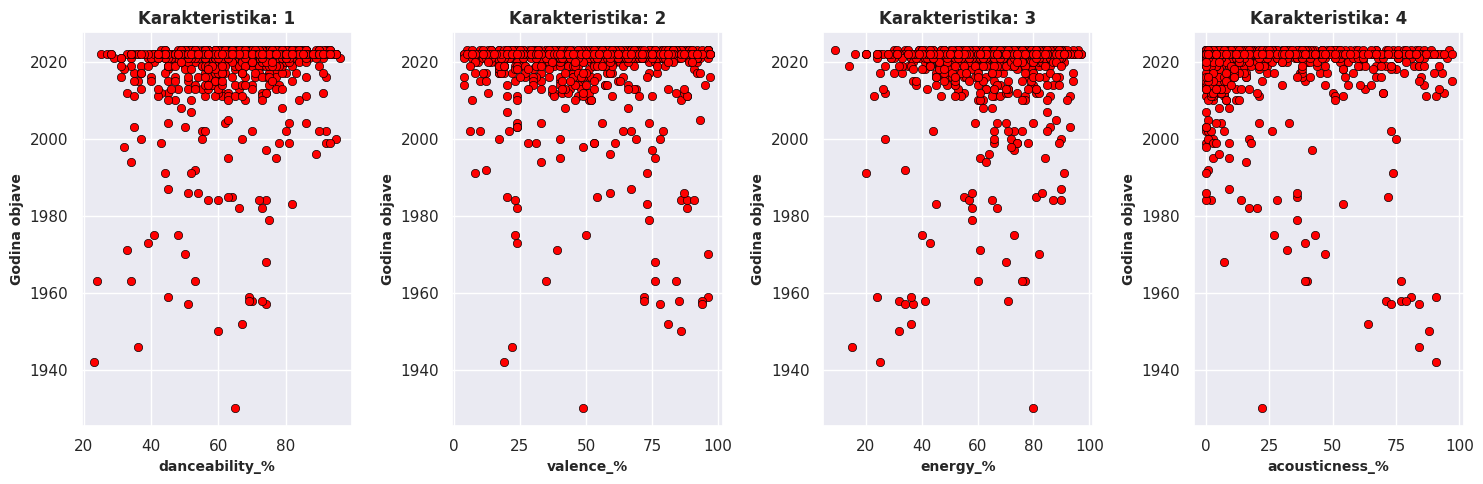

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

fig, axes = plt.subplots(1, 4, figsize=(15, 5))


song_characteristics = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Scatter plotovi za karakteristike pjesama i broj streamova po mjesecu
for i in range(1):
    for j in range(4):
        sns.scatterplot(x=song_characteristics[i*4 + j],
                        y='released_year', data=lista, ax=axes[j], color='red', edgecolor='black')
        axes[j].set_title(f'Karakteristika: {i*4 + j + 1}', fontweight='bold', fontsize=12)
        axes[j].set_xlabel(song_characteristics[i*4 + j], fontweight='bold', fontsize=10)
        axes[j].set_ylabel('Godina objave', fontweight='bold', fontsize=10)
        axes[j].grid(True)



plt.tight_layout()
plt.show()



Pregled

Iz gornjih scatter plotova možemo uočiti neke zanimljive trendove u podacima.

Na listi 1000 najboljih nema pjesama koje su manje od 20% *plesne*.

*Valence* je mješovita s uravnoteženom distribucijom.

*Energija* ima sličan obrazac sa plesnošću.

U svih 1000 najboljih pjesama ima pjesama različite* akustičnosti*, ali one koje su najbolje prošle izgleda da su na manje akustičnoj strani spektra.

Zatim ćemo pogledati srednju vrijednost i medijan ovih vrijednosti.

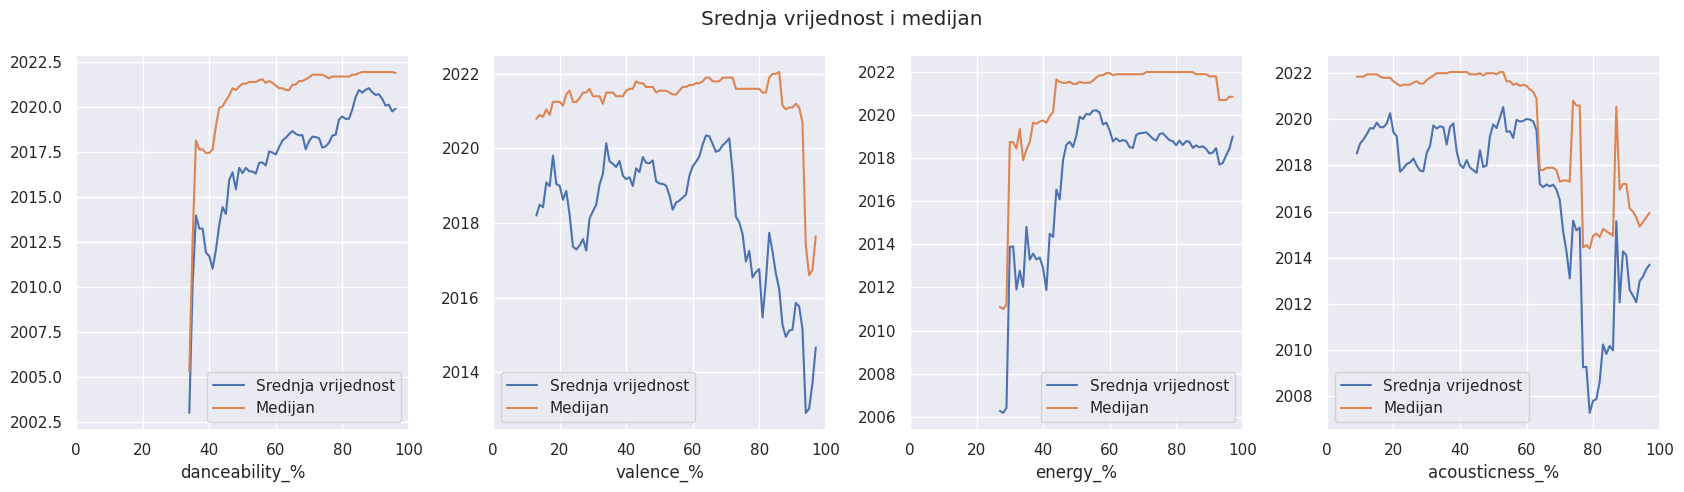

In [ ]:
window_size = 10
fig, axes = plt.subplots(1, 4, figsize=(17, 5))

plt.setp(axes, xlim=(0, 100))
plt.setp(axes, xlim=(0, 100))
fig.suptitle("Srednja vrijednost i medijan")

# Odabrane karakteristike pjesama
selected_song_characteristics = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%']

# Grafikoni za running mean i median
for i in range(1):
    for j in range(4):
        feature = lista.groupby(selected_song_characteristics[j])['released_year'].mean()
        ma = feature.rolling(window=window_size).mean()
        ma.plot(ax=axes[j], label="Srednja vrijednost", legend=True)
        feature2 = lista.groupby(selected_song_characteristics[j])['released_year'].median()
        ma2 = feature2.rolling(window=window_size).mean()
        ma2.plot(ax=axes[j], label="Medijan", legend=True)


plt.tight_layout()
plt.show()


# **Hipoteza:** Postoji značajna povezanost između karakteristika pjesama (npr. danceability, valence, energy) i njihove izvedbe u odnosu na broj streamova tokom godina na platformi Spotify.

Na osnovu prikazanih grafika, može se zaključiti da postoji značajna korelacija između karakteristika kao što su plesnost, valenca, energija i akustičnost, i broja strimova na Spotify-u tokom godina. Ove karakteristike mogu biti indikatori popularnosti određenih muzičkih žanrova. Izgleda da su pjesme koje su energične i plesne mnogo više došle do izražaja tokom prethodnih godina, što je uočljivo na prvom i trećem grafiku gdje se jasno vidi trend promjene, dok je pozitivnost (valence) i akustičnost pjesama predstavljena nekom mješovitom distribucijom na scatter plotovima.

# Hipoteza:Melanholične pjesme najčešće se izbacuju u zimskim mjesecima(decembar,januar,februar)

Ranije u tekstu smo naveli kako pjesme koje posjeduju karakteristiku plesnosti i energičnosti su popularnije posljednjih godina. Pitanje se nameće kakva je situacija sa melanholičnim i tužnim pjesmama. Sasvim je logično pretpostaviti kako raspoloženje pjesme obično zavisi od tonaliteta u kojem je napisana. Tako bi pjesme koje su napisane u minor tonalitetu trebale biti su tužne i ozbiljne, dok bi pjesme u major tonalitetu vesele i razdragane.Ovakva pretpostavka slijedi iz toga da minor tonalitet karakteriše interval zvan mala terca koji stvara zvučnu sliku koja mnogim ljudima zvuči melanholično i ispunjeno tugom. Istraživanja su pokazala da preko 20% ljudi ima simptome tzv. "zimske tuge". Ona se manifestuje u manjaku motivacije i zainteresovanosti. Nas zanima da li ljudi tada slušaju tužne pjesme, odnosno pjesme u minor tonalitetu, koje se poklapaju sa njihovim raspoloženjem, ili više teže ka veselijim pjesmama kako bi razbili monotonost. Da bi ispitali ovu našu tezu prvo moramo sa sigurnošću ustanoviti da su tužne pjesme okarakterisane minor tonalitetom, a vesele pjesme major tonalitetom. Prvo ispitajmo zastupljenost pjesama i u jednom i u drugom tonalitetu u našoj bazi podataka.

# Hipoteza:Pjesme u minor tonalitetu su melanholične, dok su pjesme u major tonalitetu vesele pjesme.

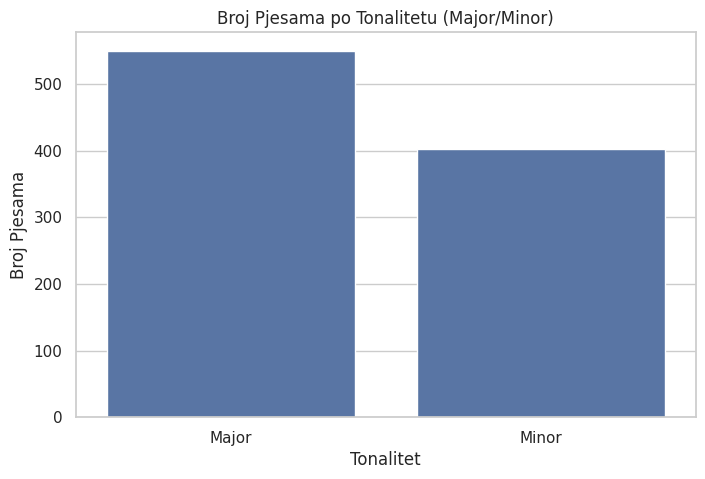

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Učitavanje podataka

data = lista.copy()

# Analiza broja pjesama po tonalitetu (major/minor)
count_by_mode = data['mode'].value_counts()

# Vizualizacija broja pjesama po tonalitetu
plt.figure(figsize=(8, 5))
sns.barplot(x=count_by_mode.index, y=count_by_mode.values)
plt.title('Broj Pjesama po Tonalitetu (Major/Minor)')
plt.xlabel('Tonalitet')
plt.ylabel('Broj Pjesama')
plt.show()

Kao što možemo da vidimo, pjesame u major tonalitetu su nešto više zastupljenje od pjesama u minor tolanitetu. To može biti povezano sa činjenicom da pjesme sa većim postotkom energičnosti,plesnosti i pozitivnosti(valence) prati veći broj streamova, te da se zbog toga muzičari više odlučuju na stvaranje upravo takvih pjesama. Međutim ovo moramo analizom utvrditi. Ono što nas zanima je šta je to što čini pjesmu tužnom ili veselom. Sasvim ima smisla posmatrati pjesme sa visokim procentom energičnosti i pozitivnosti kao vesele pjesme. Utvrdimo da postoji korelacija između ovih elemenata.

# **Pitanje 8**: Da li postoji korelacija između plesnosti, pozitivnosti i energičnosti?

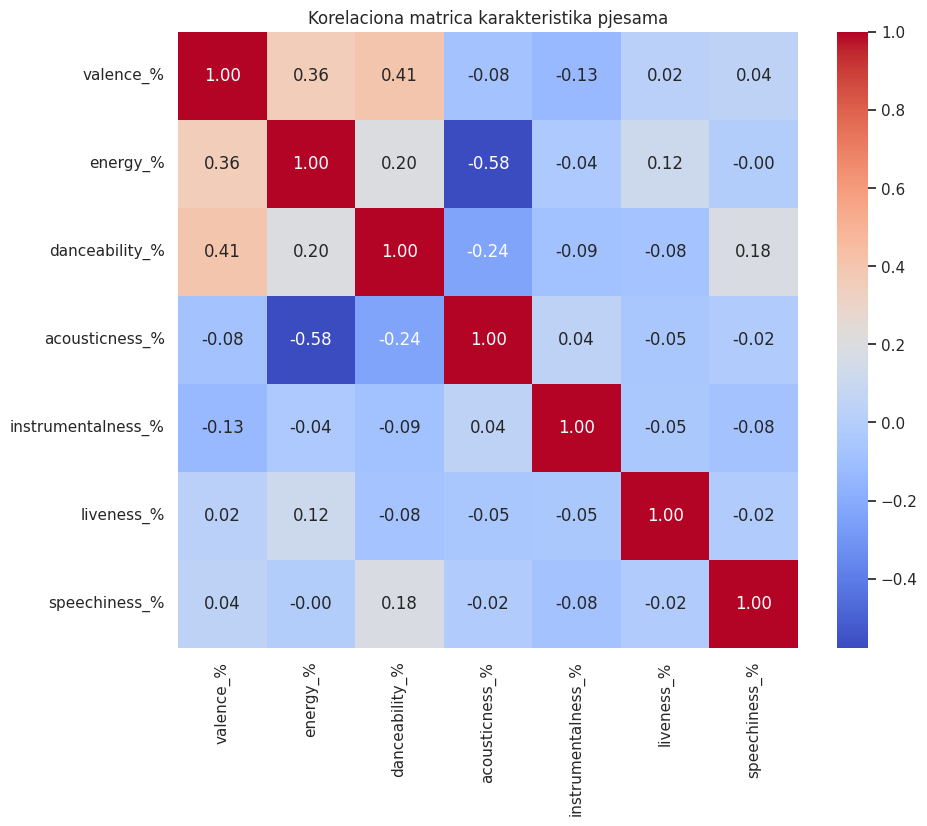

In [ ]:
# Izdvajanje relevantnih osobina za analizu
features = ['valence_%', 'energy_%', 'danceability_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Izračunavanje korelacione matrice
correlation_matrix = data[features].corr()

# Prikaz heatmap grafika za vizualizaciju korelacione matrice
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
heatmap.set_title('Korelaciona matrica karakteristika pjesama')
plt.show()

Pozitivnost pjesme (valence) ima relativno visoku pozitivnu korelaciju s energijom i plesnošću. To znači da pjesme s većom energijom i većom plesnošću obično zvuče sretnije

Sada trebamo odrediti da li postoji koleracija između tonaliteta pjesme i pristustva ovih elemenata u pjesmi. Kako bi vidjeli distribuciju ovih elemenata pjesme odvojeno za minor i major tonalitet, koristićemo box-plot.

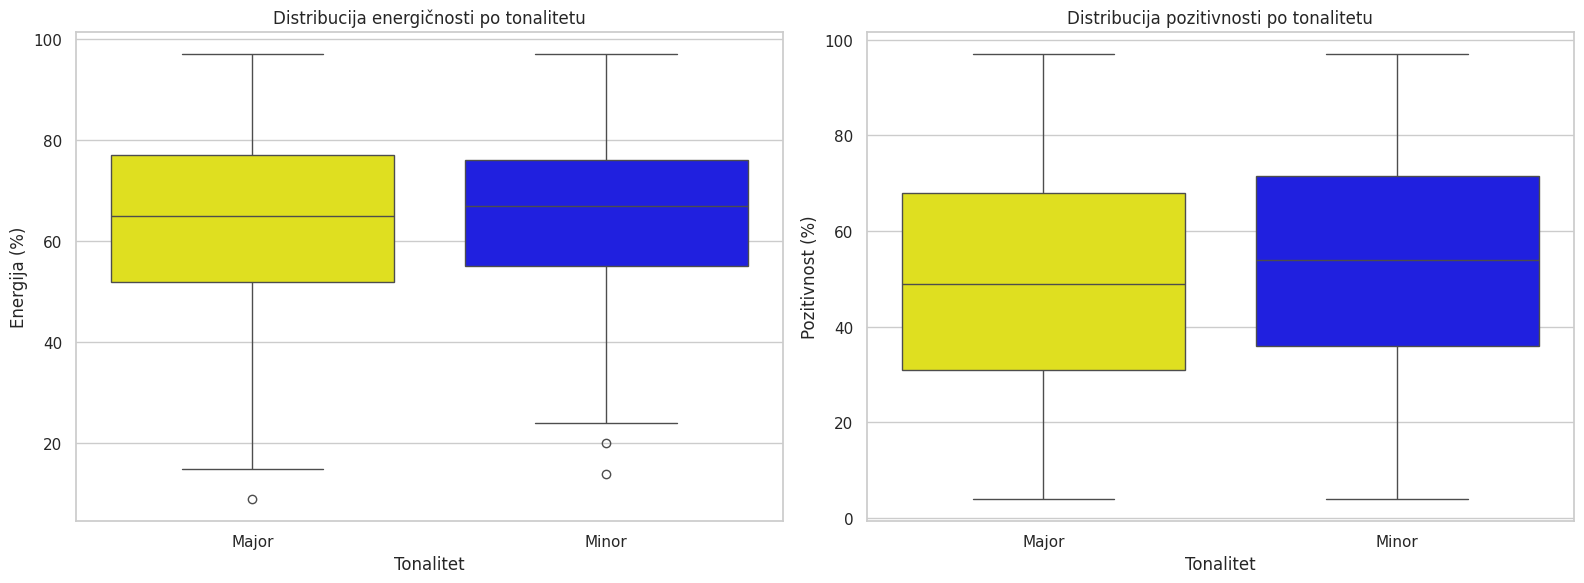

In [ ]:
data = lista.copy()

# Vizualizacija energičnosti i valence za minor i major mod
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")

# Definiranje palete boja
palette = {"Major": "yellow", "Minor": "blue"}

# Box plot za energičnost
plt.subplot(1, 2, 1)  # Promijenjen raspored na 1, 2, 1 za bolju organizaciju
sns.boxplot(x='mode', y='energy_%', hue='mode', data=data, palette=palette, dodge=False, legend=False)
plt.title('Distribucija energičnosti po tonalitetu')
plt.ylabel('Energija (%)')
plt.xlabel('Tonalitet')

# Box plot za valence
plt.subplot(1, 2, 2)  # Promijenjen raspored na 1, 2, 2
sns.boxplot(x='mode', y='valence_%', hue='mode', data=data, palette=palette, dodge=False, legend=False)
plt.title('Distribucija pozitivnosti po tonalitetu')
plt.ylabel('Pozitivnost (%)')
plt.xlabel('Tonalitet')

# Prikazivanje grafa
plt.tight_layout()
plt.show()

Posmatrajući medijanu oba blox-plota vezanih za distibuciju energije u odnosu na tonalitet, vidimo kako je približno iste vrijednosti za oba tonaliteta.Kako je IQR za box-plot vezan za minor tonalitet manji, zaključujemo manju varijablinost podatka o energičnosti, što znači da imamo konzistentniji skup podataka. Također, kada posmatramo box-plot vezan za major tonalitet vidimo veći raspon podataka, što sugeriše na veću heterogenost, odnosno veću različitnost između podataka. Na osnovu ovoga ne možemo zaključiti da postoji trend da pjesme u minor tonalitetu imaju manji procenat energičnosti, čak suprotno, vidimo da je centralna tendencija i za major i minor tonalitet približno ista, samo sa razlikom da kod minor tonaliteta imamo više vrijednosti koje se skoncetrišu oko medijane koja je otprilike 65%, što je neki srednji nivo energije. Dalje za box-plotove što se tiče pozitivnosti(valence) također suprotno očekivanjima medijana box-plota vezana za minor tonalitet je veća nego za box-plot za major. Dakle više pjesama u major tonalitetu imaju niži procenat pozitivnosti, nego one u minoru. Ovo isto možemo pokazati korsiteći histogram koji će predstavljati zajedničku distribuciju procenta energicnosti za major i minor tonalitete.

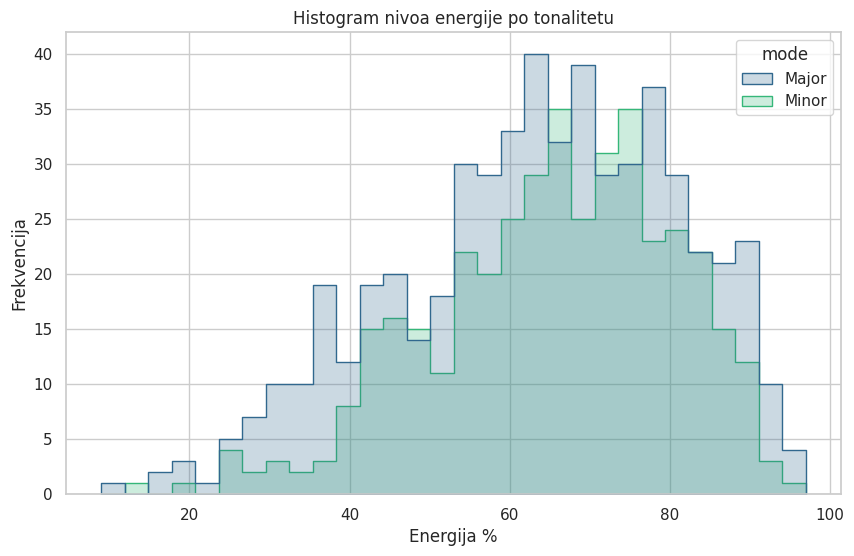

In [ ]:
sns.set(style="whitegrid")

# Kreiranje histograma za raspodelu energičnosti po modusu
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='energy_%', hue='mode', element='step', bins=30, palette='viridis')
plt.title('Histogram nivoa energije po tonalitetu')
plt.xlabel('Energija %')
plt.ylabel('Frekvencija')
plt.show()

Kako ovo nije dovoljno da zaključimo da li postoji korelacija između energičnosti i pozitivnosti, te minor i major tonaliteta, sada ćemo ispitati vrijednost kovarijanse i koeficijenta korelacije. Da bi izračunali kovarijansu potrebno je najprije pretvoriti katergoriju minor u numeričke vrijednsti 1 i 0 (1 predstavlja pojavljivanje minor tonaliteta, a 0 njegovo odsustvo, što je ustvari prisustvo major tonaliteta) jer računanje kovarijanse zahtijeva numeričke podatke. Dakle, energičnost bi bila jedna varijabla, a prisustvo minor tonaliteta koja bi bila kodirana kao binarna varijabla druga. Kovarijansa ćemo iskoristiti da saznamo da li postoji tendencija da pjesme sa većim ili nižim procentom energičnosti češće budu u minor tonalitetu.

In [ ]:
# Pretvori 'mode' iz tekstualnog oblika u numerički: 0 za Major, 1 za Minor
data['mode_numeric'] = data['mode'].apply(lambda x: 1 if x == 'Minor' else 0)

# Izračunaj kovarijansu između 'energy_%' i 'mode_numeric'
covariance_matrix = data[['energy_%', 'mode_numeric']].cov()
covariance = covariance_matrix.loc['energy_%', 'mode_numeric']

# Ispis kovarijance i dodatnih statistika za kontekst
energy_mean = data['energy_%'].mean()
mode_mean = data['mode_numeric'].mean()

# Prikaz rezultata
print("Kovarijansa između energičnosti i prisustva minor tonaliteta:", covariance)

Kovarijansa između energičnosti i prisustva minor tonaliteta: 0.4516442223577126


Kovarijansa između energičnosti pjesama (u procentima) i prisustva minor tonaliteta je približno 0.449. Ovo je relativno mala pozitivna vrijednost, što ukazuje na to da, kako energičnost pjesama raste, neznatno raste i vjerovatnoća da je pjesma u minoru, ali je ovaj odnos vrlo slab. Za jačinu veze izračunajmo i koeficijent korelacije.

In [ ]:

correlation_matrix = data[['energy_%', 'mode_numeric']].corr()
correlation_coefficient = correlation_matrix.loc['energy_%', 'mode_numeric']

correlation_coefficient

0.055175345196886154

Koeficijent korelacije između energičnosti pjesama i prisustva minor tonaliteta je približno 0.055. Ova vrijednost je vrlo blizu nuli, što ukazuje na to da postoji vrlo slab linearni odnos između ove dvije varijable. Isto izračunajmo i za utvrđivanje korelacije između procenata pozitivnosti i prisustva minor tonaliteta.

In [ ]:
# Pretvori 'mode' iz tekstualnog oblika u numerički: 0 za Major, 1 za Minor
if 'mode_numeric' not in data.columns:
    data['mode_numeric'] = data['mode'].apply(lambda x: 1 if x == 'Minor' else 0)

# Izračunaj kovarijansu između 'valence_%' i 'mode_numeric'
covariance_matrix_valence = data[['valence_%', 'mode_numeric']].cov()
covariance_valence = covariance_matrix_valence.loc['valence_%', 'mode_numeric']

# Izračunaj koeficijent korelacije između 'valence_%' i 'mode_numeric'
correlation_matrix_valence = data[['valence_%', 'mode_numeric']].corr()
correlation_coefficient_valence = correlation_matrix_valence.loc['valence_%', 'mode_numeric']

# Ispis rezultata
print("Kovarijansa između pozitivnosti i prisustva minor tonaliteta:", covariance_valence)
print("Koeficijent korelacije između pozitivnosti i prisustva minor tonaliteta:", correlation_coefficient_valence)

Kovarijansa između pozitivnosti i prisustva minor tonaliteta: 0.7583337751504386
Koeficijent korelacije između pozitivnosti i prisustva minor tonaliteta: 0.06533149791939076


Kovarijansa između pozitivnosti (valence) pjesama i prisustva minor tonaliteta je približno 0.747, a koeficijent korelacije između ovih dviju varijabli je oko 0.064. Ovo ukazuje na to da, slično kao s energičnošću, postoji vrlo slab pozitivan linearni odnos između pozitivnosti pjesama i minor tonaliteta. Dakle zaključujemo da naša hipoteza nije bila ispravna.


Kako smo dobili da nema korelacije između tonaliteta pjesme i njenog raspoloženja, uzet ćemo samo karakteristiku pozitivnosti da nam diktira raspoloženje pjesme. Prvo ćemo napraviti dvije kategorije gdje je prva kategorija tužne pjesme koja ima ispod 50% pozitivnosti, te sretne pjesme koja ima 50% i iznad pozitivnosti. Zatim ćemo na grafiku pokazati distribuciju objavljivanja ovih pjesama po mjesecima.

<Figure size 1000x600 with 0 Axes>

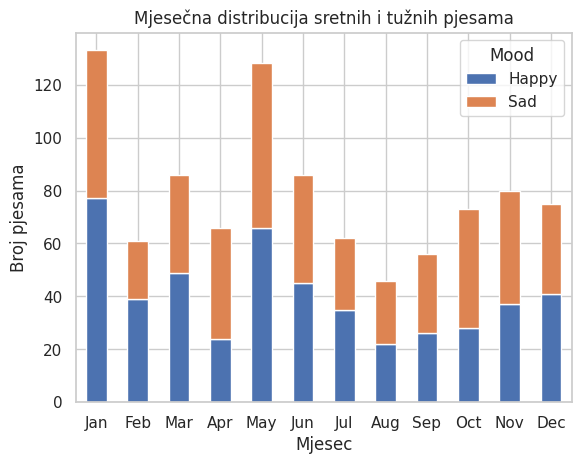

In [ ]:

data['mood'] = data['valence_%'].apply(lambda x: 'Happy' if x > 50 else 'Sad')


monthly_mood_distribution = data.groupby(['released_month', 'mood']).size().unstack(fill_value=0)


plt.figure(figsize=(10, 6))
monthly_mood_distribution.plot(kind='bar', stacked=True)
plt.title('Mjesečna distribucija sretnih i tužnih pjesama')
plt.xlabel('Mjesec')
plt.ylabel('Broj pjesama')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(title='Mood')
plt.show()

Kao što vidimo u januaru je izdan daleko najveći broj tužnih pjesama u poređenju u poređenju sa brojem izdatih sretnih pjesama tako i globalno, što do neke mjere može da potvrdi našu hipotezu. Međutim vidimo da je tokom cijele godine broj tužnih pjesama koje su izdane zaista veliki i uvijek premašuje sretne pjesme, te narpčito vidimo neočekivani skok izdanog broja tužnih pjesama u maju, tako da ne možemo sa sigurnošću reći da postoji trend objavljivanja tužnih pjesama u zimskim mjesecima.

# **Hipoteza**: Pjesme sa velikim procentom karakteristike danceability se najbolje rankirane na apple, spotify, deezer i shazam chartovima

Kako se plesnost pokazala kao dosta značajna karakteristika koja utječe na popularnost pjesme, možemo provjeriti da li pjesme sa većim prisustvom ove karakteristike uzrokuje trajanje pjesme veći broj dana na spotify chartovima. Da bismo odredili zajedničku distribuciju plesnosti i dana na Spotify chartovima, koristit ćemo dvodimenzionalnu gustinu vjerovatnoće, koja prikazuje kako se ove dvije varijable distribuiraju zajedno.

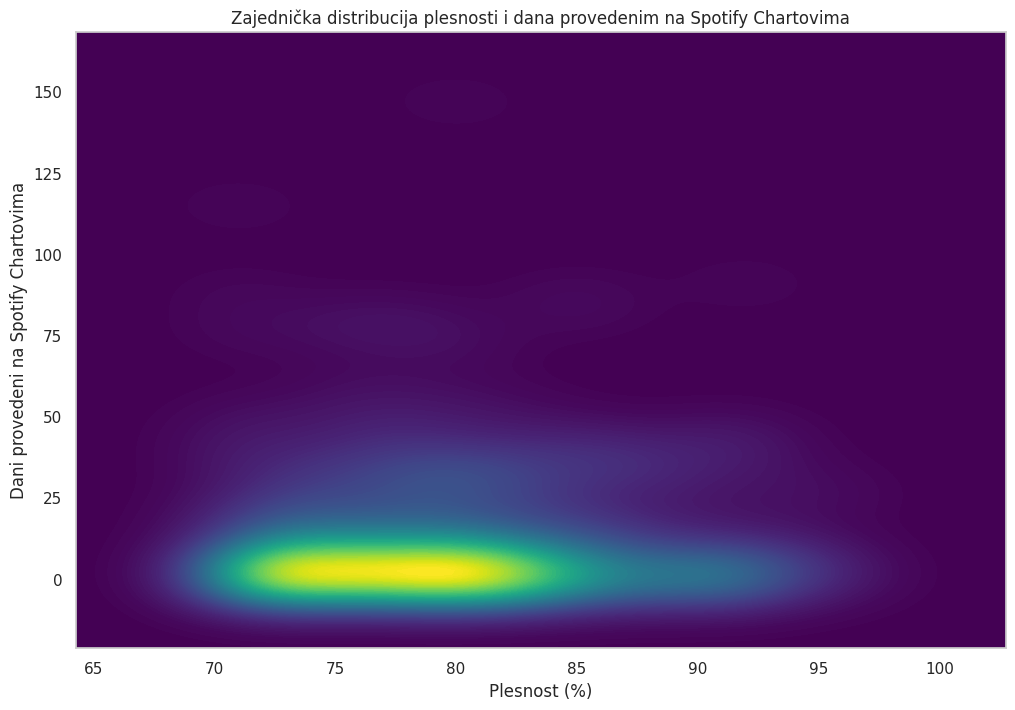

In [ ]:

filtered_data = data[data['danceability_%'] > 70]


plt.figure(figsize=(12, 8))
sns.kdeplot(
    data=filtered_data,
    x="danceability_%",
    y="in_spotify_charts",
    fill=True,
    thresh=0,
    levels=100,
    cmap="viridis"
)
plt.title('Zajednička distribucija plesnosti i dana provedenim na Spotify Chartovima')
plt.xlabel('Plesnost (%)')
plt.ylabel('Dani provedeni na Spotify Chartovima')
plt.show()


Na grafiku konture gustine vjerovatnoće vidimo odnos između plesnosti i broja dana provedenih na Spotify chartovima. Intenzivniji regioni pokazuju veću gustinu tačaka, što znači da je veći broj pjesama koncentrisan u tim oblastima. Vidimo da većina pjesama s visokom plesnošću zapravo ima tendenciju da provede relativno malo dana na Spotify chartovima. Dakle možemo da zaključimo kako ovakve pjesme, iako izazovu veliku vjerovatno naglu popularnost, nemaju dugoročno interesovanje publike na platformi spotify.

# **Pitanje 9**: Koja je vjerovatnoća da ako pjesma ima preko 70% danceability da se pojavi na spotify chartu.

Kako bu ovo izračunali koristićemo uslovnu vjerovatnoću, odnosno P(Chart|Danceability>70%).

In [ ]:


filtered_data = data[data['danceability_%'] > 70]


number_on_chart = filtered_data[filtered_data['in_spotify_charts'] > 0].shape[0]


total_high_danceability = filtered_data.shape[0]


probability_on_chart = number_on_chart / total_high_danceability


print(f'Broj pjesama s danceability > 70% na chartovima: {number_on_chart}')
print(f'Ukupan broj pjesama s danceability > 70%: {total_high_danceability}')
print(f'Vjerovatnoća da pjesma s danceability > 70% bude na chartovima: {probability_on_chart:.2f}')

Broj pjesama s danceability > 70% na chartovima: 253
Ukupan broj pjesama s danceability > 70%: 428
Vjerovatnoća da pjesma s danceability > 70% bude na chartovima: 0.59


Dakle, iako plesnost preko 70% može pomoći pjesmi da stekne neku inicijalnu pažnju i pojavi se na Spotify chartovima, to ne garantuje da će pjesma održati svoju popularnost ili ostati duže vrijeme na listama

# **Pitanje 10:** Postoji li veza između broja dodavanja u Spotify playliste i broja slušanja?

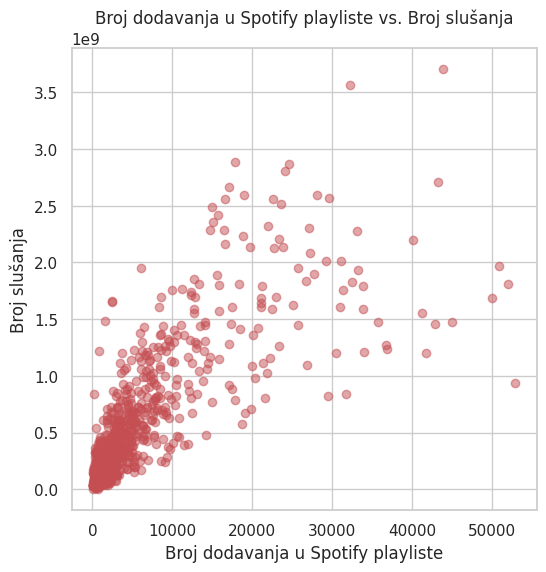

Korelacija između broja dodavanja u Spotify playliste i broja slušanja: 0.7898221599550624


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

lista = pd.read_csv('/content/drive/MyDrive/datasets/spotify-2023.csv',encoding='iso-8859-1')



lista['streams'] = pd.to_numeric(lista['streams'], errors='coerce')


playlist_adds = lista['in_spotify_playlists']
streams = lista['streams']


plt.figure(figsize=(6, 6))
plt.scatter(playlist_adds, streams, color='r', alpha=0.5)
plt.title('Broj dodavanja u Spotify playliste vs. Broj slušanja')
plt.xlabel('Broj dodavanja u Spotify playliste')
plt.ylabel('Broj slušanja')
plt.grid(True)
plt.show()


correlation = playlist_adds.corr(streams)
print("Korelacija između broja dodavanja u Spotify playliste i broja slušanja:", correlation)


# Hipoteza:  Predviđamo da će pjesme koje su dodane u veći broj Spotify playlista imati i veći broj slušanja.

 Možemo izračunati očekivanu vrijednost broja slušanja za pjesme koje su dodane u različit broj Spotify playlista te provjeriti postoji li korelacija između ova dva faktora. Nakon izračunavanja i prikazanog grafika vidimo sljedeće. Postoji značajna linearna zavisnost jer je vrijednost korelacije blizu 1, što znači ako povećamo broj slušanja pjesme povećava se i njeno dodavanje u mnogobrojne Spotify playliste. Dakle, pjesme koje se često dodaju u playliste vjerojatno će imati i veći broj slušanja.


# **Pitanje 11**: Utječe li energetski sadržaj pjesme na njezinu popularnost na Spotifyju?

Korelacija između postotka energije i broja slušanja: -0.026051488364248917


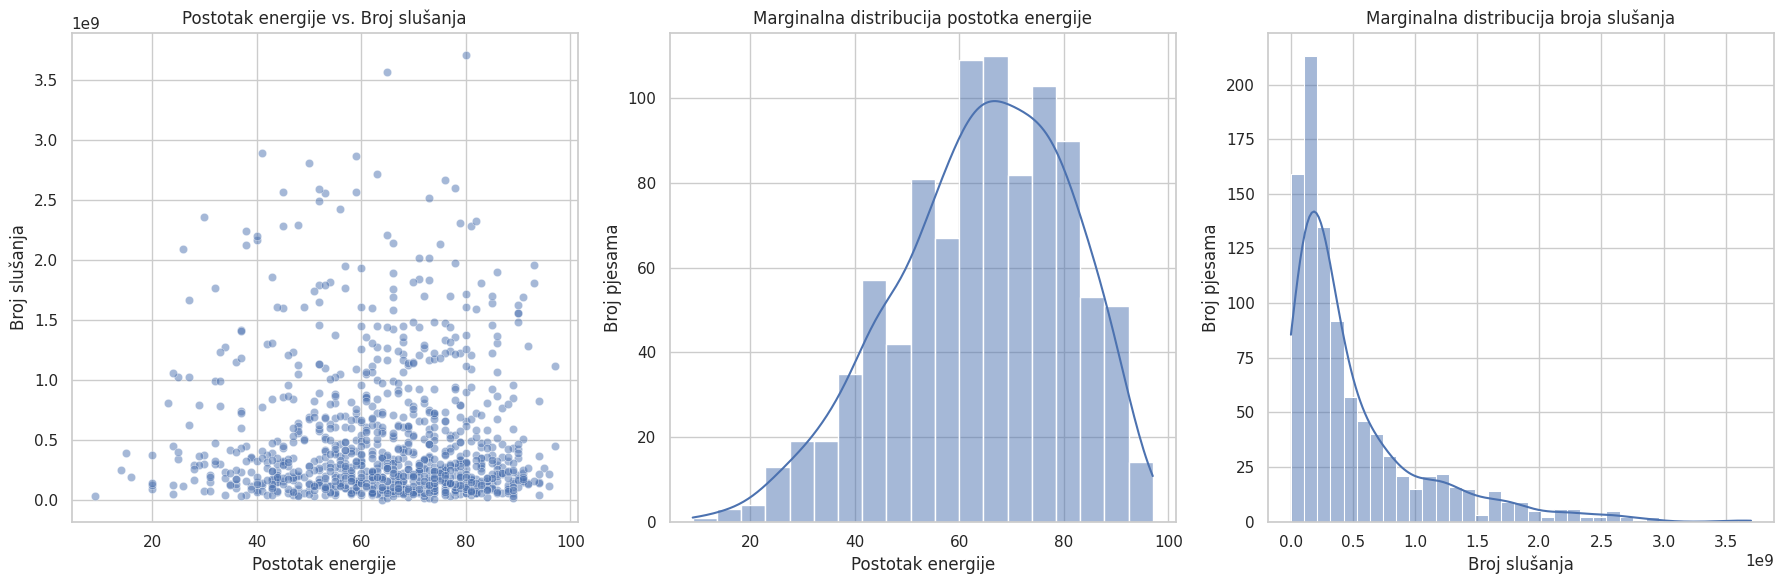

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


lista = pd.read_csv('/content/drive/MyDrive/datasets/spotify-2023.csv',encoding='iso-8859-1')


energy_percentage = lista['energy_%']
streams = pd.to_numeric(lista['streams'], errors='coerce')


correlation = energy_percentage.corr(streams)
print("Korelacija između postotka energije i broja slušanja:", correlation)


plt.figure(figsize=(18, 6))


plt.subplot(1, 3, 1)
sns.scatterplot(x=energy_percentage, y=streams, color='b', alpha=0.5)
plt.title('Postotak energije vs. Broj slušanja')
plt.xlabel('Postotak energije')
plt.ylabel('Broj slušanja')
plt.grid(True)


plt.subplot(1, 3, 2)
energy_distribution = sns.histplot(energy_percentage, kde=True)
energy_distribution.set_title('Marginalna distribucija postotka energije')
plt.xlabel('Postotak energije')
plt.ylabel('Broj pjesama')


plt.subplot(1, 3, 3)
streams_distribution = sns.histplot(streams, kde=True)
streams_distribution.set_title('Marginalna distribucija broja slušanja')
plt.xlabel('Broj slušanja')
plt.ylabel('Broj pjesama')

plt.tight_layout()
plt.show()


# **Pitanje 12**: Koji je procenat pjesama unutar dvije standardne devijacije od očekivane vrijednosti

Kako bismo dobili uvid u raspon popularnosti pjesama, koristimo Chebysheov teorem, koji omogućuje procjenu proporcije podataka unutar određenog broja standardnih odstupanja od srednje vrijednosti.

In [ ]:
lista_copy = lista.copy()
lista_copy['streams'] = pd.to_numeric(lista_copy['streams'], errors='coerce')
lista_copy.dropna(subset=['streams'], inplace=True)
mean_streams = lista_copy['streams'].mean()
std_dev_streams = lista_copy['streams'].std()

k = 2
lower_bound = mean_streams - k * std_dev_streams
upper_bound = mean_streams + k * std_dev_streams

songs_within_bounds = lista_copy[(lista_copy['streams'] >= lower_bound) & (lista_copy['streams'] <= upper_bound)]
percentage_within_bounds = len(songs_within_bounds) / len(lista_copy)

print("Procenat pjesama unutar dva standardna odstupanja od očekivane vrijednosti:", percentage_within_bounds)

Procenat pjesama unutar dva standardna odstupanja od očekivane vrijednosti: 0.9390756302521008


Analiza broja strimova na spotify-evom datasetu za top pjesme, koristeći Chebysheov teorem, otkriva da gotovo 94% ovih vrhunskih pjesama ima sličan broj slušatelja, s obzirom na opseg unutar dva standardna odstupanja od prosječnog broja strimova. Ovaj visoki procenat sugerira relativnu stabilnost popularnosti među najpopularnijim pjesmama na Spotify platformi osim u nekim posebnim slučajeva.

Da bi bolje razumijeli ovaj broj, pomogao bi nam vizuelni prikaz

In [ ]:
within_bounds = lista_copy[(lista_copy['streams'] >= lower_bound) & (lista_copy['streams'] <= upper_bound)]
percentage_within_bounds = len(within_bounds) / len(lista_copy)
ukupno_pjesama = len(lista_copy)
pjesme_unutar_raspona = len(within_bounds)
labels = ['Unutar Raspona', 'Izvan Raspona']
sizes = [pjesme_unutar_raspona, ukupno_pjesama - pjesme_unutar_raspona]
colors = ['#66c2a5', '#fc8d62']
explode = [0.1, 0]

fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, hole=.4, marker=dict(colors=colors), pull=explode)])

fig.update_layout(title='Procenat pjesama unutar/izvan raspona od dvije standardne devijacije (Chebysheov teorem)',
                   title_font=dict(size=20, family="Arial, sans-serif"),
                   title_font_color="#333333",
                   showlegend=True,
                   legend=dict(font=dict(size=12)),
                   margin=dict(t=100, b=100, l=100, r=100))

fig.show()

# **Pitanje 13**: Koje su razlike između karakteristika pjesama na spotify chartovima i pjesama van spotify chartova?

Da bi prvobitno primjetili razlike između istih tipova podataka, najpovoljnije nam je koristiti bar-plot i box-plot i sa njih očitati vrijednosti.

In [ ]:
import plotly.graph_objects as go
lista_copy=lista.copy()
chart_songs = lista_copy[lista_copy['in_spotify_charts'] != 0]
non_chart_songs = lista_copy[lista_copy['in_spotify_charts'] == 0]
categories = ['BPM', 'Danceability', 'Valence', 'Energy', 'Acousticness', 'Instrumentalness', 'Liveness', 'Speechiness']
chart_avg = chart_songs.select_dtypes(include='number').mean()
non_chart_avg = non_chart_songs.select_dtypes(include='number').mean()
chart_values = [chart_avg['bpm'], chart_avg['danceability_%'], chart_avg['valence_%'], chart_avg['energy_%'], chart_avg['acousticness_%'], chart_avg['instrumentalness_%'], chart_avg['liveness_%'], chart_avg['speechiness_%']]
non_chart_values = [non_chart_avg['bpm'], non_chart_avg['danceability_%'], non_chart_avg['valence_%'], non_chart_avg['energy_%'], non_chart_avg['acousticness_%'], non_chart_avg['instrumentalness_%'], non_chart_avg['liveness_%'], non_chart_avg['speechiness_%']]
textures = ['', '/', '\\', 'x', '-', '|', '+', '.']
fig = go.Figure()
for i, characteristic in enumerate(categories):
    fig.add_trace(go.Bar(
        x=[characteristic],
        y=[chart_values[i]],
        name='Chart Songs',
        marker=dict(
            color='rgba(255, 99, 71, 0.7)',
            pattern=dict(
                shape=textures[i],
                size=8,
                fgopacity=0.7
            )
        ),
        offsetgroup='Chart Songs',
        width=0.4,
    ))
for i, characteristic in enumerate(categories):
    fig.add_trace(go.Bar(
        x=[characteristic],
        y=[non_chart_values[i]],
        name='Non-Chart Songs',
        marker=dict(
            color='rgba(30, 144, 255, 0.7)',
            pattern=dict(
                shape=textures[i],
                size=8,
                fgopacity=0.7
            )
        ),
        offsetgroup='Non-Chart Songs',
        width=0.4,
    ))
fig.update_layout(
    barmode='group',
    title='Prosječne karakteristike Chart vs Non-Chart pjesama',
    xaxis_title='Karakteristike',
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
fig.show()


In [ ]:
from plotly.subplots import make_subplots
chart_songs = lista_copy[lista_copy['in_spotify_charts'] != 0]
non_chart_songs = lista_copy[lista_copy['in_spotify_charts'] == 0]
categories = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
num_categories = len(categories)
num_cols = 2
num_rows = num_categories // num_cols
if num_categories % num_cols != 0:
    num_rows += 1
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=categories, column_widths=[0.5, 0.5])
for i, characteristic in enumerate(categories):
    chart_values = chart_songs[characteristic]
    non_chart_values = non_chart_songs[characteristic]
    row = i // num_cols + 1
    col = i % num_cols + 1

    fig.add_trace(go.Box(y=chart_values, name='Chart Songs', marker=dict(color='rgba(255, 99, 71, 0.7)'), boxmean=True, legendgroup='chart', showlegend=False if i != 0 else True), row=row, col=col)
    fig.add_trace(go.Box(y=non_chart_values, name='Non-Chart Songs', marker=dict(color='rgba(30, 144, 255, 0.7)'), boxmean=True, legendgroup='non_chart', showlegend=False if i != 0 else True), row=row, col=col)
fig.update_layout(
    title='Distribucija karakteristika Chart vs Non-Chart pjesama',
    height=2000,
    showlegend=True,
)
fig.show()



Prije analiziranja važno je znati koje metrike Spotify koristi za određivanje pjesama koje zaslužuju biti na chartovima. Prema Spotify dokumentaciji, te su metrike:

a. Strimovi: Koliko puta korisnici puštaju pjesmu

b. Slušaoci: Broj jedinstvenih korisnika koji su pustili određenu pjesmu.

c. Viralnost: Stopa dijeljenja pjesme.

d. Stopa spremanja: Udio slušalaca koji dodaju pjesmu na svoje osobne playliste nakon slušanja.

e. Stopa preskakanja: Učestalost kojom korisnici preskaču određenu pjesmu prije nego što završi.

Za razliku od korištenja samo jedne metrike poput broja strimova, kada je neka pjesma na chartovima dobijamo puno više informacija. Informacije koje dobijamo o pjesmi su da je ona veoma akutelna u tom momentu, da je često korisnici dodaju u svoje playliste i da se pjesma brzo širi preko drugih platformi.

Analizom plotova možemo zaključiti da pjesme u Spotify chartovima imaju blago veće vrijednost karakteristika: BPM, danceability, valence i energy, a blago manje vrijednosti za: acousticness, instrumentalness, liveness i speechiness. Ovi rezultati sugeriraju da popularne pjesme na Spotifyju češće koriste dinamične, ritmične i emotivne elemente, dok su malo manje skloni instrumentalnim aranžmanima, i govornim dijelovima.

Ranija istraživanja su pokazala pozitivnu korelaciju između plesnosti i energičnosti s brojem strimova, što dodatno potvrđuje zaključke ove analize plotova.

Važno je napomenuti da ovi plotovi ne prikazuju velike razlike u karakteristikama i ne znače da se svaka pjesma na chartovima pridržava ovih pravila. Čak i sa box-plotovima primjećujemo dosta odstupanja kod karakteristika poput liveness,speechiness i instrumentalness. Iako su ovi rezultati značajni za razumijevanje trenutnih trendova u glazbenoj industriji, treba imati na umu da se ovi trendovi često mijenjaju i razvijaju kroz vrijeme.

# Interaktivni prikaz najslušanijih umjetnika i njihovih najpopularnijih pjesama

Ovaj interaktivni graf pruža pregled najslušanijih umjetnika i njihovih najpopularnijih pjesama prema broju strimova.

Koristimo sunburst dijagram koji omogućava korisnicima da istražuju podatke u hijerarhijskoj strukturi. Na glavnom nivou, graf prikazuje top umjetnike, dok se podaci o njihovim najpopularnijim pjesmama prikazuju kao podgrane. Svaka grana sunburst dijagrama predstavlja jednog umjetnika, a podgrane te grane predstavljaju njegove najpopularnije pjesme.

Dodatno, graf uključuje informacije o karakteristikama pjesama poput BPM, key i mode koje su prikazane na odgovarajućim nivoima sunburst dijagrama. Ovaj interaktivni prikaz omogućava korisnicima da preglednije primjete karakteristike kod nekog malog uzorka najslusanijih umjetnika. Da bi detaljnije analizirali nekog umjetnika samo je potrebno kliknuti odgovarajuće polje.

In [ ]:
lista['streams'] = lista['streams'].str.extract('(\d+)$')
lista['streams'] = pd.to_numeric(lista['streams'])

aggregated_data = lista.groupby(['artist(s)_name', 'track_name']).agg({
    'streams': 'sum',
    'bpm': 'first',
    'key': 'first',
    'mode': 'first',
    'danceability_%': 'first',
    'valence_%': 'first',
    'energy_%': 'first',
    'acousticness_%': 'first',
    'instrumentalness_%': 'first',
    'liveness_%': 'first',
    'speechiness_%': 'first'
}).reset_index()

artist_totals = aggregated_data.groupby('artist(s)_name').agg({'streams': 'sum'}).reset_index()
top_artists = artist_totals.nlargest(5, 'streams')['artist(s)_name']

filtered_data = aggregated_data[aggregated_data['artist(s)_name'].isin(top_artists)]

top_songs_by_artist = filtered_data.groupby('artist(s)_name').apply(lambda x: x.nlargest(7, 'streams')).reset_index(drop=True)

top_songs_by_artist['mode_key_bpm'] = top_songs_by_artist.apply(lambda row: f"{row['mode']}/{row['key']}/{row['bpm']}", axis=1)

fig = px.sunburst(top_songs_by_artist,
                  path=['artist(s)_name', 'track_name', 'mode_key_bpm'],
                  values='streams', title='-Najslušaniji umjetnici<br>-Njihove pjesme<br>-Mode/Key/BPM')
fig.show()


# Zaključak

 Naš tim je kao zadatak dobio da analizira skup podataka vezanih za najslušanije pjesme na platformi Spotify. Skup podataka se sastojao od raznih informacija kao što su ime pjesme, ime izvođača, broj pregleda na Spotify-u, datum objave pjesme, njen rank, kako na Spotify-u tako i na aplikacijama Apple Music, Deezer i Shazam, neke karakteristike pjesama kao što su plesnost i energičnost i brojne druge. Mi smo nastojali analizirati ovaj skup podataka sa različitih aspekata, te smo kroz našu analizu trudili se da koristimo razne vrste grafičkog prikaza kako bi došli do što boljih zaključaka. U ovu svrhu smo najviše koristili grafike objašnjene na predavanjima, ali također smo radi želje za raznovrsnijim prikazom podataka koristili i grafike kao što su pie chart, line plot, heatmap, sunburst chart itd. Nešto što je bio fokus našeg interesovanja jeste da utvrdimo koji to faktori pospješuju slušanost neke pjesme. Neke od naših hipoteza su bile: „Režim muzike utječe na slušanost pjesama“, „Mjesec i dan objave pjesme utiču na njenu popularnost“, „Postoji korelacija između broja pjesama autora na Spotify-u i njihove ukupne popularnosti“. Ova tema nas je zaintrigirala jer smo željeli da utvrdimo da li postoji neki recept po kojem će neka pjesma biti uspješna ili ne. Također smo htjeli ustanoviti šta to oblikuje pjesmu, odnosno koje karakteristike najviše utječu na nju, te da li postoji korelacija između njenih pojedinih karakteristika kao što su plesnost, pozitivnost i energičnost, kako bmp pjesme utječe na ostale njene karakteristike i slično. Ono što smo naučili kroz ovaj rad jeste da iako se neka pretpostavka može činiti sasvim logična i razumna, nekada podvrgnuta detaljnoj analizi će dati rezultate suprotne očekivanjima. Također smo našu temu obradili i sa aspekta vjerovatnoće, pa smo tako imali pitanja kao što su: „Ako znamo da pjesma koju posmatramo je pjesma od Taylor Swift, koja je vjerovatnoća da je ta pjesma upravo Anti-Hero?“, „Koja je vjerovatnoća da ako pjesma ima preko 70% danceability da se pojavi na Spotify chartu“. Ovim pitanjima i hipotezama uspješno smo dokazali primjenu uslovne vjerovatnoće i Bayesovog pravila.

 Rad u timu je bio ravnopravno podijeljen, te je svako analizirao po 5 hipoteza ili pitanja.